# Messing with PACE Data and Megafauna


### This notebook loads the NEFSC Mid-Atlantic cetacean survey data and explores PACE data topics and processes

First we need to import the appropriate packages and then log into NASA Earth Access with credentials


In [1]:
import earthaccess
import xarray as xr

In [2]:
auth = earthaccess.login()# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)


Next we need to find the shortname and/or concept_id for data collections. We go to https://search.earthdata.nasa.gov/search to do that. We can also search by sensor, and after select one, work out what sensor to look for data with. 

In [3]:
results = earthaccess.search_datasets(instrument="oci")
for item in results[1:100]:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_UVAI_UAA_NRT
PACE_OCI_L2_UVAI_UAA
PACE_OCI_L2_AER_UAA_NRT
PACE_OCI_L2_AER_UAA
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_AOP
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_CLOUD
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_BGC
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L3B_AOT_NRT
PACE_OCI_L3B_AOT
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_AVW
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_LANDVI_NRT
PACE_OCI_L3B_LANDVI
PACE_OCI_L3B_PIC_NRT
PACE_OCI_L3B_PIC
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_POC
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_PAR
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3B_RRS
PACE_OCI_L3B_SFREFL_NRT
PACE_OCI_L3B_SFREFL
PACE_OCI_L3M_UVAI_UAA_NRT
PACE_

## 1. CHL Visualization and Data Extraction
Let's first practice with the level 3 mapped Remote satellite reflectance PACE_OCI_L3M_RRS, though we can changes this to other products. The temporal period here is one day of the survey effort for the Mid-Atlantic Marine Mammal Survey. There were quite a few observations on 2/22/2025 so trying that out first. We can also add in the bounding box for the region.

In [4]:

results = earthaccess.search_data(
    short_name = 'PACE_OCI_L4M_MOANA',
    temporal = ("2025-02-22", "2025-02-22"),
    bounding_box = (-71.5, 35.5, -77.0, 41.0)
)
len(results)

14


If there are a lot of results, filtering by granual helps. First look at the list of results to see what granuals there are. 

In [5]:
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250125_20250225.L4m.R32.MOANA.V3_1.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250125_20250225.L4m.R32.MOANA.V3_1.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250201_20250228.L4m.MO.MOANA.V3_1.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250201_20250228.L4m.MO.MOANA.V3_1.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250202_20250305.L4m.R32.MOANA.V3_1.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250202_20250305.L4m.R32.MOANA.V3_1.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250210_20250313.L4m.R32.MOANA.V3_1.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250210_20250313.L4m.R32.MOANA.V3_1.

Then we can specify the granual that we would like with the data query.

In [6]:
# bounding_box = (lat_min, lon_min, lat_max, lon_max)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L4M_MOANA',
    temporal = ("2025-02-22", "2025-02-22"),
    granule_name="*.8D.*.4km.*",
    bounding_box = (-71.5, 35.5, -77.0, 41.0)
)
len(results)

1

We look at the file names

In [7]:
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250218_20250225.L4m.8D.MOANA.V3_1.4km.nc']]


Next x-array opens the data, and then we read one file in

In [8]:
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
ds = xr.open_dataset(fileset[0])
ds

<xarray.Dataset> Size: 213MB
Dimensions:          (lat: 3360, lon: 2640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 13kB 69.98 69.94 69.9 ... -69.9 -69.94 -69.98
  * lon              (lon) float32 11kB -84.98 -84.94 -84.9 ... 24.9 24.94 24.98
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    prococcus_moana  (lat, lon) float64 71MB ...
    syncoccus_moana  (lat, lon) float64 71MB ...
    picoeuk_moana    (lat, lon) float64 71MB ...
    palette          (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20250218_20250225.L4m.8D.MOAN...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L4M/MOANA/3.1
    data_bins:                         3428822
    data_minimum:                      0.0
    data_maximum:                      2.5036956e+10

## 

## 

For working with MOANA, need to first setup a few things. Let's follow Ryan's code and map the data. 



In [10]:
# Load Libraries for printing
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gc

# Create a coarsen function to speed up plotting
# subsample the lat/lons. We don't need to show all
def coarsen_da(da, step=2):
    return da.isel(lat=slice(None, None, step),
                   lon=slice(None, None, step))

In [11]:
# Define metadata for plots
phyto_info = {
    "Prochlorococcus": {
        "data": ds["prococcus_moana"],
        "cmap": plt.cm.Blues,
        "label": "Prochlorococcus conc. (cells mL⁻¹)"
    },
    "Synechococcus": {
        "data": ds["syncoccus_moana"],
        "cmap": plt.cm.Reds,
        "label": "Synechococcus conc. (cells mL⁻¹)"
    },
    "Picoeukaryotes": {
        "data": ds["picoeuk_moana"],
        "cmap": plt.cm.Greens,
        "label": "Picoeukaryote conc. (cells mL⁻¹)"
    }
}

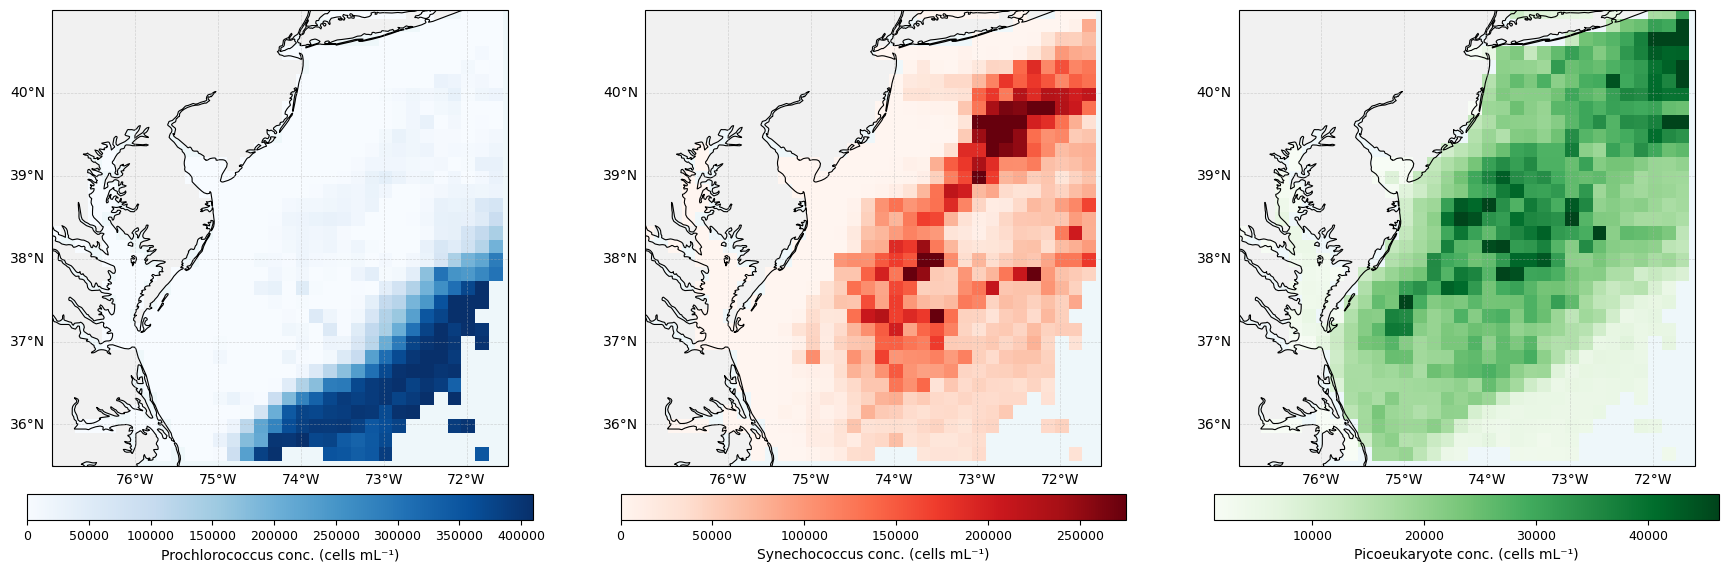


Plot extent: -77.0°W to -71.5°W, 35.5°N to 41.0°N


In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ===== DEFINE YOUR STUDY AREA =====
lon_min, lon_max = -77.0, -71.5
lat_min, lat_max = 35.5, 41.0

# ===== SUBSET DATA TO STUDY AREA =====
# Assuming phyto_info is already loaded with your MOANA data
# Subset each dataset to your bounding box
phyto_info_subset = {}

for title, info in phyto_info.items():
    # Subset the data to your study area
    da_subset = info["data"].sel(
        lat=slice(lat_max, lat_min),  # Note: slice(max, min) for descending lat
        lon=slice(lon_min, lon_max)
    )
    
    phyto_info_subset[title] = {
        "data": da_subset,
        "cmap": info["cmap"],
        "label": info["label"]
    }

# ===== CREATE PLOTS =====
fig, axs = plt.subplots(1, 3, figsize=(18, 6),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Plot each phytoplankton group 
for ax, (title, info) in zip(axs, phyto_info_subset.items()):
    # Coarsen if needed (optional - can skip for better resolution)
    da = coarsen_da(info["data"], step=4)  # Remove this line if you want full resolution
    
    ax.set_title(title, fontsize=13, fontweight='bold')
    
    # Set extent to your study area
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Add features
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.2)
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    # Plot data
    img = da.plot(
        ax=ax,
        cmap=info["cmap"],
        robust=True,
        add_colorbar=False,
        transform=ccrs.PlateCarree()
    )
    
    # Add colorbar
    cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05, shrink=0.9)
    cbar.set_label(info["label"], fontsize=10)
    cbar.ax.tick_params(labelsize=9)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_study_area_overview.png',
            dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPlot extent: {lon_min}°W to {lon_max}°W, {lat_min}°N to {lat_max}°N")

Next we will overlay our observations and save this plot

OBSERVATIONS SUMMARY
Total observations: 121

Species breakdown:
common_name
Fin whale                     55
Humpback whale                47
Common minke whale             7
Sperm whale                    7
Blue whale                     2
Beaked whales                  2
North Atlantic right whale     1
Name: count, dtype: int64


/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '



✓ Figure saved to: /home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_with_mammal_observations.png


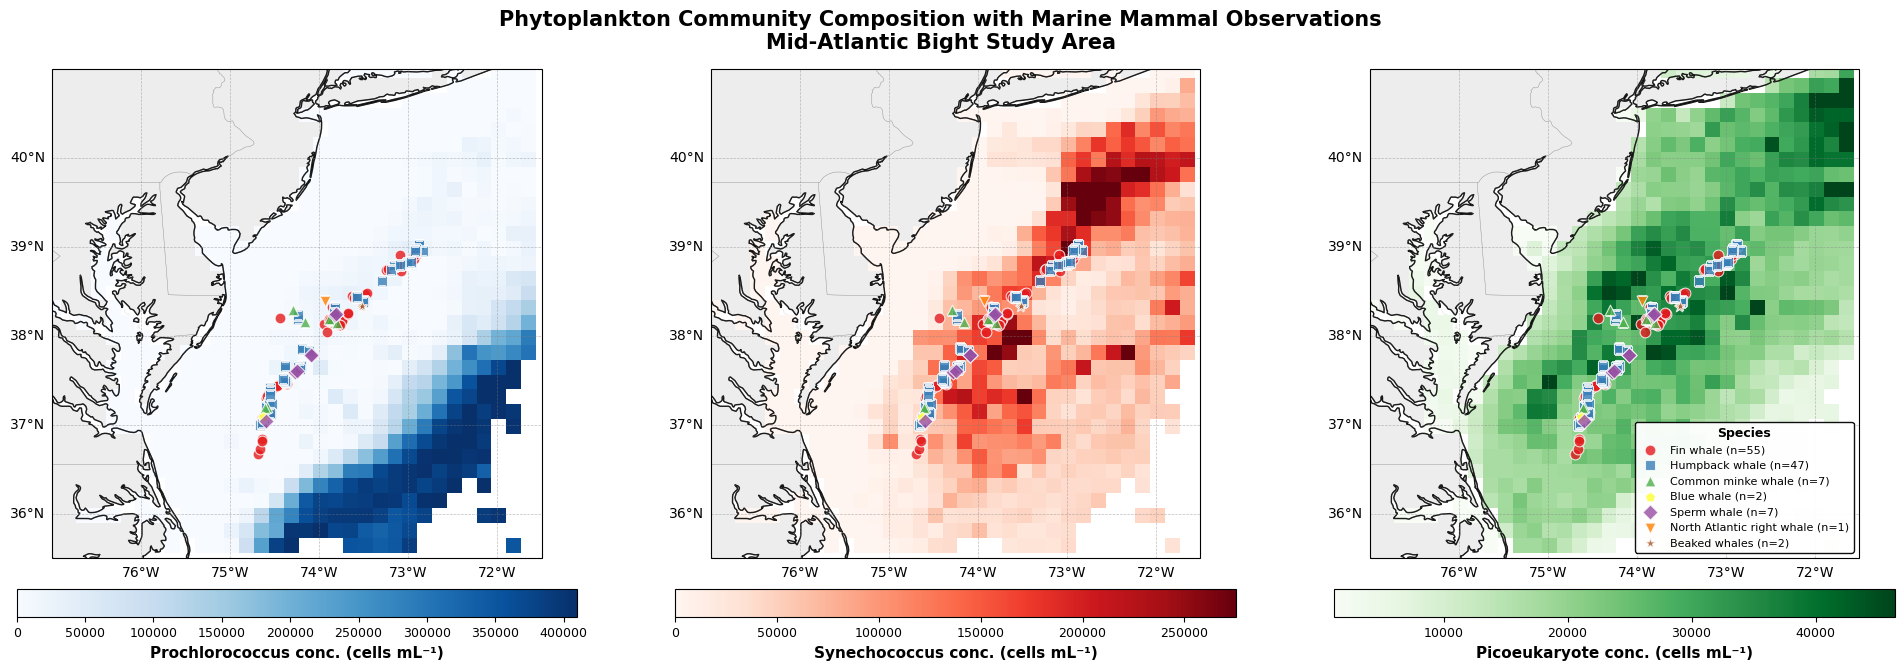


Plot extent: -77.0°W to -71.5°W, 35.5°N to 41.0°N


In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np

# ===== LOAD OBSERVATIONS =====
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

print("="*70)
print("OBSERVATIONS SUMMARY")
print("="*70)
print(f"Total observations: {len(obs)}")
print(f"\nSpecies breakdown:")
print(obs['common_name'].value_counts())

# ===== DEFINE YOUR STUDY AREA =====
lon_min, lon_max = -77.0, -71.5
lat_min, lat_max = 35.5, 41.0

# ===== DEFINE SPECIES COLORS AND MARKERS =====
species_list = obs['common_name'].unique()

# Color palette - distinct colors for each species
species_colors = {
    'Fin whale': '#e41a1c',           # Red
    'Humpback whale': '#377eb8',      # Blue
    'Common minke whale': '#4daf4a',  # Green
    'Sperm whale': '#984ea3',         # Purple
    'North Atlantic right whale': '#ff7f00',  # Orange
    'Blue whale': '#ffff33',          # Yellow
    'Beaked whales': '#a65628'        # Brown
}

# Markers for each species
species_markers = {
    'Fin whale': 'o',
    'Humpback whale': 's',
    'Common minke whale': '^',
    'Sperm whale': 'D',
    'North Atlantic right whale': 'v',
    'Blue whale': 'p',
    'Beaked whales': '*'
}

# ===== SUBSET DATA TO STUDY AREA =====
phyto_info_subset = {}

for title, info in phyto_info.items():
    da_subset = info["data"].sel(
        lat=slice(lat_max, lat_min),
        lon=slice(lon_min, lon_max)
    )
    
    phyto_info_subset[title] = {
        "data": da_subset,
        "cmap": info["cmap"],
        "label": info["label"]
    }

# ===== CREATE PLOTS WITH OBSERVATIONS =====
fig, axs = plt.subplots(1, 3, figsize=(20, 7),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Plot each phytoplankton group 
for ax, (title, info) in zip(axs, phyto_info_subset.items()):
    # Coarsen if needed (optional)
    da = coarsen_da(info["data"], step=4)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Set extent to your study area
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Add features
    ax.coastlines(resolution='10m', linewidth=1, color='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.3, color='gray')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.4)
    ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='gray', alpha=0.5)
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--', color='gray')
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    # Plot phytoplankton data
    img = da.plot(
        ax=ax,
        cmap=info["cmap"],
        robust=True,
        add_colorbar=False,
        transform=ccrs.PlateCarree()
    )
    
    # Add colorbar
    cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05, shrink=0.9)
    cbar.set_label(info["label"], fontsize=11, fontweight='bold')
    cbar.ax.tick_params(labelsize=9)
    
    # ===== ADD MARINE MAMMAL OBSERVATIONS BY SPECIES =====
    for species in species_list:
        species_obs = obs[obs['common_name'] == species]
        
        # Get color and marker for this species
        color = species_colors.get(species, 'black')
        marker = species_markers.get(species, 'o')
        
        ax.scatter(species_obs['longitude'], 
                  species_obs['latitude'],
                  c=color,
                  marker=marker,
                  s=60,
                  alpha=0.8,
                  edgecolors='white',
                  linewidths=0.8,
                  transform=ccrs.PlateCarree(),
                  label=f'{species} (n={len(species_obs)})',
                  zorder=5)

# ===== ADD LEGEND (only to rightmost panel to avoid clutter) =====
# Create legend with all species
handles, labels = axs[2].get_legend_handles_labels()
legend = axs[2].legend(handles, labels,
                       loc='lower right',
                       fontsize=8,
                       framealpha=0.95,
                       edgecolor='black',
                       title='Species',
                       title_fontsize=9)
legend.get_title().set_fontweight('bold')

# Add main title
fig.suptitle('Phytoplankton Community Composition with Marine Mammal Observations\nMid-Atlantic Bight Study Area', 
             fontsize=15, fontweight='bold', y=0.98)

plt.tight_layout()

# ===== SAVE TO OUTPUT FOLDER =====
output_path = '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_with_mammal_observations.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✓ Figure saved to: {output_path}")

plt.show()

print(f"\nPlot extent: {lon_min}°W to {lon_max}°W, {lat_min}°N to {lat_max}°N")

Let's now just do that quantitative information on the latitude distribution as in Ryan's code for our bounding box. 

✓ Figure saved!


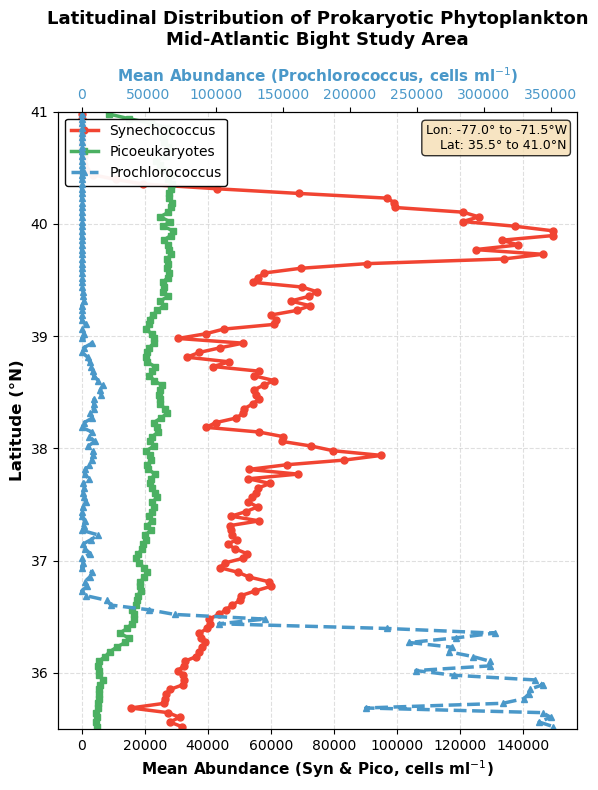

In [14]:
import matplotlib.pyplot as plt

# ===== DEFINE YOUR STUDY AREA =====
lon_min, lon_max = -77.0, -71.5
lat_min, lat_max = 35.5, 41.0

# ===== SUBSET TO STUDY AREA AND CALCULATE MEDIAN ACROSS LONGITUDE =====
syn = ds["syncoccus_moana"].sel(
    lat=slice(lat_max, lat_min),
    lon=slice(lon_min, lon_max)
).median(dim=["lon"])

pro = ds["prococcus_moana"].sel(
    lat=slice(lat_max, lat_min),
    lon=slice(lon_min, lon_max)
).median(dim=["lon"])

pico = ds["picoeuk_moana"].sel(
    lat=slice(lat_max, lat_min),
    lon=slice(lon_min, lon_max)
).median(dim=["lon"])

# ===== CUSTOM COLORS =====
custom_colors = {
    "Prochlorococcus": plt.cm.Blues(0.6),
    "Synechococcus": plt.cm.Reds(0.6),
    "Picoeukaryotes": plt.cm.Greens(0.6)
}

# ===== CREATE PLOT =====
fig, ax1 = plt.subplots(figsize=(6, 8))

# Primary axis: Syn and Pico
ax1.plot(syn, syn["lat"], label="Synechococcus", 
         color=custom_colors["Synechococcus"], linewidth=2.5, marker='o', markersize=5)
ax1.plot(pico, pico["lat"], label="Picoeukaryotes", 
         color=custom_colors["Picoeukaryotes"], linewidth=2.5, marker='s', markersize=5)
ax1.set_ylabel("Latitude (°N)", fontsize=12, fontweight='bold')
ax1.set_xlabel("Mean Abundance (Syn & Pico, cells ml$^{-1}$)", 
               color="black", fontsize=11, fontweight='bold')
ax1.tick_params(axis='x', labelcolor="black", labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

# Set y-axis limits to your study area
ax1.set_ylim(lat_min, lat_max)

# Secondary axis: Prochlorococcus
ax2 = ax1.twiny()
ax2.plot(pro, pro["lat"], label="Prochlorococcus", 
         color=custom_colors["Prochlorococcus"], linestyle="--", linewidth=2.5, 
         marker='^', markersize=5)
ax2.set_xlabel("Mean Abundance (Prochlorococcus, cells ml$^{-1}$)", 
               color=custom_colors["Prochlorococcus"], fontsize=11, fontweight='bold')
ax2.tick_params(axis='x', labelcolor=custom_colors["Prochlorococcus"], labelsize=10)

# Combine legends - MOVED TO UPPER LEFT
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, 
          loc="upper left", fontsize=10, framealpha=0.95, edgecolor='black')

plt.title("Latitudinal Distribution of Prokaryotic Phytoplankton\nMid-Atlantic Bight Study Area", 
         fontsize=13, fontweight='bold', pad=15)

# Add study area info as text - MOVED TO UPPER RIGHT
textstr = f'Lon: {lon_min}° to {lon_max}°W\nLat: {lat_min}° to {lat_max}°N'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8, edgecolor='black')
ax1.text(0.98, 0.98, textstr, transform=ax1.transAxes, fontsize=9,
        verticalalignment='top', horizontalalignment='right', bbox=props)

ax1.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()

plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Prokaryote_Latitudinal_Distribution.png',
           dpi=300, bbox_inches='tight')
print("✓ Figure saved!")

plt.show()

Lazy loading the data just to practice

In [15]:
downloaded_files = earthaccess.download(
    results[0:9],
    local_path='data',
)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]








If we are running RRS, then we can look at wavelength, but not for CHL. This will let us see what wavelenths are available

In [16]:
# ds1['wavelength']

Plotting the chlorophyll data for our box

We need to pull in the observation data and overlay on the map as well. 


Overlaying the observations of marine mammals just to test...

## 2. Extracting CHL For marine mammal observations and plotting

The plot above is for a single day, and that's not really anything we can work with for the full dataset which extends from Dec 28 to March 28. So we will need to look through to extract the appropriate data.We are leveraging the 3x3 section of code (though it is modified here to fit our use case) from the "matchups.ipynb." 1. What is the 3x3 box? A 3x3 pixel box means extracting 9 pixels (3×3 grid) centered on your observation point. This helps:

Reduce noise from individual bad pixels (clouds, glint, etc.)
Account for spatial uncertainty in the whale's exact position
Better represent the environment the whale is actually experiencing (they move through a patch, not a single point) 


In [17]:
import earthaccess
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm

# ===== LOAD EXISTING CHLOROPHYLL DATA =====
print("="*70)
print("LOADING EXISTING CHLOROPHYLL DATA")
print("="*70)

existing_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_chlorophyll.csv')

print(f"Loaded {len(existing_df)} observations with chlorophyll data")

# Convert date column to datetime
existing_df['date'] = pd.to_datetime(existing_df['date'])

# Get unique dates
unique_dates = existing_df['date'].unique()
print(f"\nFound {len(unique_dates)} unique observation dates")

# Login to earthaccess
auth = earthaccess.login()

# Define your bounding box
bounding_box = (-77.0, 35.5, -71.5, 41.0)

# Store MOANA results
moana_results = []

# ===== EXTRACT ONLY MOANA DATA =====
print("\n" + "="*70)
print("EXTRACTING MOANA PHYTOPLANKTON COMMUNITY DATA")
print("="*70)

for date in tqdm(unique_dates, desc="Processing unique dates"):
    
    # For 8-day composites, search +/- 7 days
    start = (date - pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    end = (date + pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    
    try:
        # Search for MOANA product
        results_moana = earthaccess.search_data(
            short_name='PACE_OCI_L4M_MOANA',
            temporal=(start, end),
            granule_name="*.8D.*.4km.*",
            bounding_box=bounding_box
        )
        
        if not results_moana:
            print(f"No MOANA data found for {date}")
            continue
        
        # FIXED: Only use the FIRST granule to avoid duplicates
        fileset_moana = earthaccess.open([results_moana[0]])  # Just take first result!
        
        for ea_file_moana in fileset_moana:
            with xr.open_dataset(ea_file_moana, engine="h5netcdf") as ds_moana:
                
                # Get observations for this date
                points_today = existing_df[existing_df['date'] == date]
                
                lat_vals = ds_moana.lat.values
                lon_vals = ds_moana.lon.values
                
                for idx, row in tqdm(points_today.iterrows(), 
                                    total=len(points_today), 
                                    desc=f"Points on {date.date()}", 
                                    leave=False):
                    
                    lat_center = row['latitude']
                    lon_center = row['longitude']
                    
                    # Find nearest indices for 3x3 box
                    lat_idx = np.abs(lat_vals - lat_center).argmin()
                    lon_idx = np.abs(lon_vals - lon_center).argmin()
                    
                    lat_slice = slice(max(lat_idx-1, 0), min(lat_idx+2, len(lat_vals)))
                    lon_slice = slice(max(lon_idx-1, 0), min(lon_idx+2, len(lon_vals)))
                    
                    # ===== EXTRACT ONLY VARIABLES THAT EXIST IN L4M =====
                    moana_variables = {
                        # Prokaryote abundances (cells/ml) - THESE EXIST
                        'synechococcus': 'syncoccus_moana',
                        'prochlorococcus': 'prococcus_moana',
                        'picoeukaryotes': 'picoeuk_moana'
                    }
                    
                    # Create result row
                    moana_row = {
                        'Original_Index': idx,
                    }
                    
                    # Extract MOANA statistics
                    for var_name, var_key in moana_variables.items():
                        if var_key in ds_moana.variables:
                            var_box = ds_moana[var_key].isel(lat=lat_slice, lon=lon_slice)
                            
                            moana_row[f'{var_name}_mean'] = float(var_box.mean(skipna=True).values)
                            moana_row[f'{var_name}_median'] = float(var_box.median(skipna=True).values)
                            moana_row[f'{var_name}_std'] = float(var_box.std(skipna=True).values)
                            moana_row[f'{var_name}_min'] = float(var_box.min(skipna=True).values)
                            moana_row[f'{var_name}_max'] = float(var_box.max(skipna=True).values)
                            moana_row[f'{var_name}_q25'] = float(var_box.quantile(0.25, skipna=True).values)
                            moana_row[f'{var_name}_q75'] = float(var_box.quantile(0.75, skipna=True).values)
                        else:
                            # Variable doesn't exist
                            moana_row[f'{var_name}_mean'] = np.nan
                            moana_row[f'{var_name}_median'] = np.nan
                            moana_row[f'{var_name}_std'] = np.nan
                            moana_row[f'{var_name}_min'] = np.nan
                            moana_row[f'{var_name}_max'] = np.nan
                            moana_row[f'{var_name}_q25'] = np.nan
                            moana_row[f'{var_name}_q75'] = np.nan
                    
                    moana_results.append(moana_row)
                    
    except Exception as e:
        print(f"Error processing {date}: {e}")
        continue

# ===== MERGE MOANA DATA WITH EXISTING CHLOROPHYLL DATA =====
if moana_results:
    print("\n" + "="*70)
    print("MERGING DATASETS")
    print("="*70)
    
    moana_df = pd.DataFrame(moana_results)
    
    print(f"Extracted MOANA data for {len(moana_df)} observations")
    print(f"Expected: {len(existing_df)} observations")
    
    if len(moana_df) != len(existing_df):
        print(f"⚠️ WARNING: Observation count mismatch!")
        print(f"  This suggests duplicate processing occurred.")
    
    # Merge
    combined_df = existing_df.merge(moana_df, left_index=True, right_on='Original_Index', how='left')
    
    if 'Original_Index' in combined_df.columns:
        combined_df = combined_df.drop(columns=['Original_Index'])
    
    # Save
    output_file = "/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_and_MOANA.csv"
    combined_df.to_csv(output_file, index=False)
    
    print("\n" + "="*70)
    print("DATA EXTRACTION AND MERGE COMPLETE")
    print("="*70)
    print(f"✓ CSV saved: {output_file}")
    print(f"✓ Total observations: {len(combined_df)}")
    print(f"✓ Total columns: {len(combined_df.columns)}")
    
    # Check for missing data
    print("\n=== Missing Data Summary ===")
    moana_cols = [col for col in combined_df.columns if any(x in col for x in ['synechococcus', 'prochlorococcus', 'picoeukaryotes'])]
    missing_counts = combined_df[moana_cols].isnull().sum()
    
    if missing_counts.sum() > 0:
        print("Observations with missing MOANA data:")
        print(missing_counts[missing_counts > 0])
        print(f"\nTotal with complete data: {combined_df[moana_cols].notna().all(axis=1).sum()}/{len(combined_df)}")
    else:
        print("✓ No missing data!")
    
    # Summary statistics
    print("\n=== Prokaryote Abundance Summary ===")
    for var in ['synechococcus_median', 'prochlorococcus_median', 'picoeukaryotes_median']:
        if var in combined_df.columns:
            print(f"\n{var.replace('_median', '').title()} (cells/ml):")
            print(f"  Mean: {combined_df[var].mean():.2e}")
            print(f"  Median: {combined_df[var].median():.2e}")
            print(f"  Range: {combined_df[var].min():.2e} - {combined_df[var].max():.2e}")
    
    print("\n=== By Species ===")
    print("\nSynechococcus abundance (cells/ml):")
    print(combined_df.groupby('common_name')['synechococcus_median'].describe())
    
else:
    print("\n⚠ No MOANA data extracted.")

LOADING EXISTING CHLOROPHYLL DATA
Loaded 332 observations with chlorophyll data

Found 19 unique observation dates

EXTRACTING MOANA PHYTOPLANKTON COMMUNITY DATA


Processing unique dates:   0%|          | 0/19 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   5%|▌         | 1/19 [00:07<02:23,  7.97s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  11%|█         | 2/19 [00:14<02:01,  7.17s/it]A

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  16%|█▌        | 3/19 [00:19<01:40,  6.27s/it]A

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  21%|██        | 4/19 [00:25<01:30,  6.00s/it]A

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  26%|██▋       | 5/19 [00:30<01:20,  5.77s/it]A

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  32%|███▏      | 6/19 [00:35<01:10,  5.43s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  37%|███▋      | 7/19 [00:41<01:05,  5.47s/it]A

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  42%|████▏     | 8/19 [00:45<00:58,  5.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Points on 2025-01-24:  10%|█         | 1/10 [00:00<00:01,  4.72it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, ou

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  53%|█████▎    | 10/19 [00:56<00:48,  5.35s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  58%|█████▊    | 11/19 [01:02<00:42,  5.31s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  63%|██████▎   | 12/19 [01:07<00:37,  5.37s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  68%|██████▊   | 13/19 [01:13<00:33,  5.51s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  74%|███████▎  | 14/19 [01:18<00:27,  5.40s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  79%|███████▉  | 15/19 [01:24<00:22,  5.62s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  84%|████████▍ | 16/19 [01:29<00:16,  5.34s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  89%|████████▉ | 17/19 [01:35<00:11,  5.50s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  95%|█████████▍| 18/19 [01:40<00:05,  5.31s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates: 100%|██████████| 19/19 [01:45<00:00,  5.55s/it]


MERGING DATASETS
Extracted MOANA data for 332 observations
Expected: 332 observations

DATA EXTRACTION AND MERGE COMPLETE
✓ CSV saved: /home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_and_MOANA.csv
✓ Total observations: 332
✓ Total columns: 37

=== Missing Data Summary ===
Observations with missing MOANA data:
synechococcus_mean        2
synechococcus_median      2
synechococcus_std         2
synechococcus_min         2
synechococcus_max         2
synechococcus_q25         2
synechococcus_q75         2
prochlorococcus_mean      2
prochlorococcus_median    2
prochlorococcus_std       2
prochlorococcus_min       2
prochlorococcus_max       2
prochlorococcus_q25       2
prochlorococcus_q75       2
picoeukaryotes_mean       2
picoeukaryotes_median     2
picoeukaryotes_std        2
picoeukaryotes_min        2
picoeukaryotes_max        2
picoeukaryotes_q25        2
picoeukaryotes_q75        2
dtype: int64

Total with complete data: 330/332

=== Prokaryote Abundance Summary 





Next we get to plot the time series data yay!
We are also going to put together another few figures for dataset - as well as summary stats table. 


Loaded 332 observations
Columns: ['Original_Index_x', 'latitude', 'longitude', 'date_time', 'date', 'common_name', 'scientific_name', 'group_size', 'chlor_a_mean', 'chlor_a_median', 'chlor_a_std', 'chlor_a_min', 'chlor_a_max', 'chlor_a_q25', 'chlor_a_q75', 'Original_Index_y', 'synechococcus_mean', 'synechococcus_median', 'synechococcus_std', 'synechococcus_min', 'synechococcus_max', 'synechococcus_q25', 'synechococcus_q75', 'prochlorococcus_mean', 'prochlorococcus_median', 'prochlorococcus_std', 'prochlorococcus_min', 'prochlorococcus_max', 'prochlorococcus_q25', 'prochlorococcus_q75', 'picoeukaryotes_mean', 'picoeukaryotes_median', 'picoeukaryotes_std', 'picoeukaryotes_min', 'picoeukaryotes_max', 'picoeukaryotes_q25', 'picoeukaryotes_q75']

Creating time series plots...


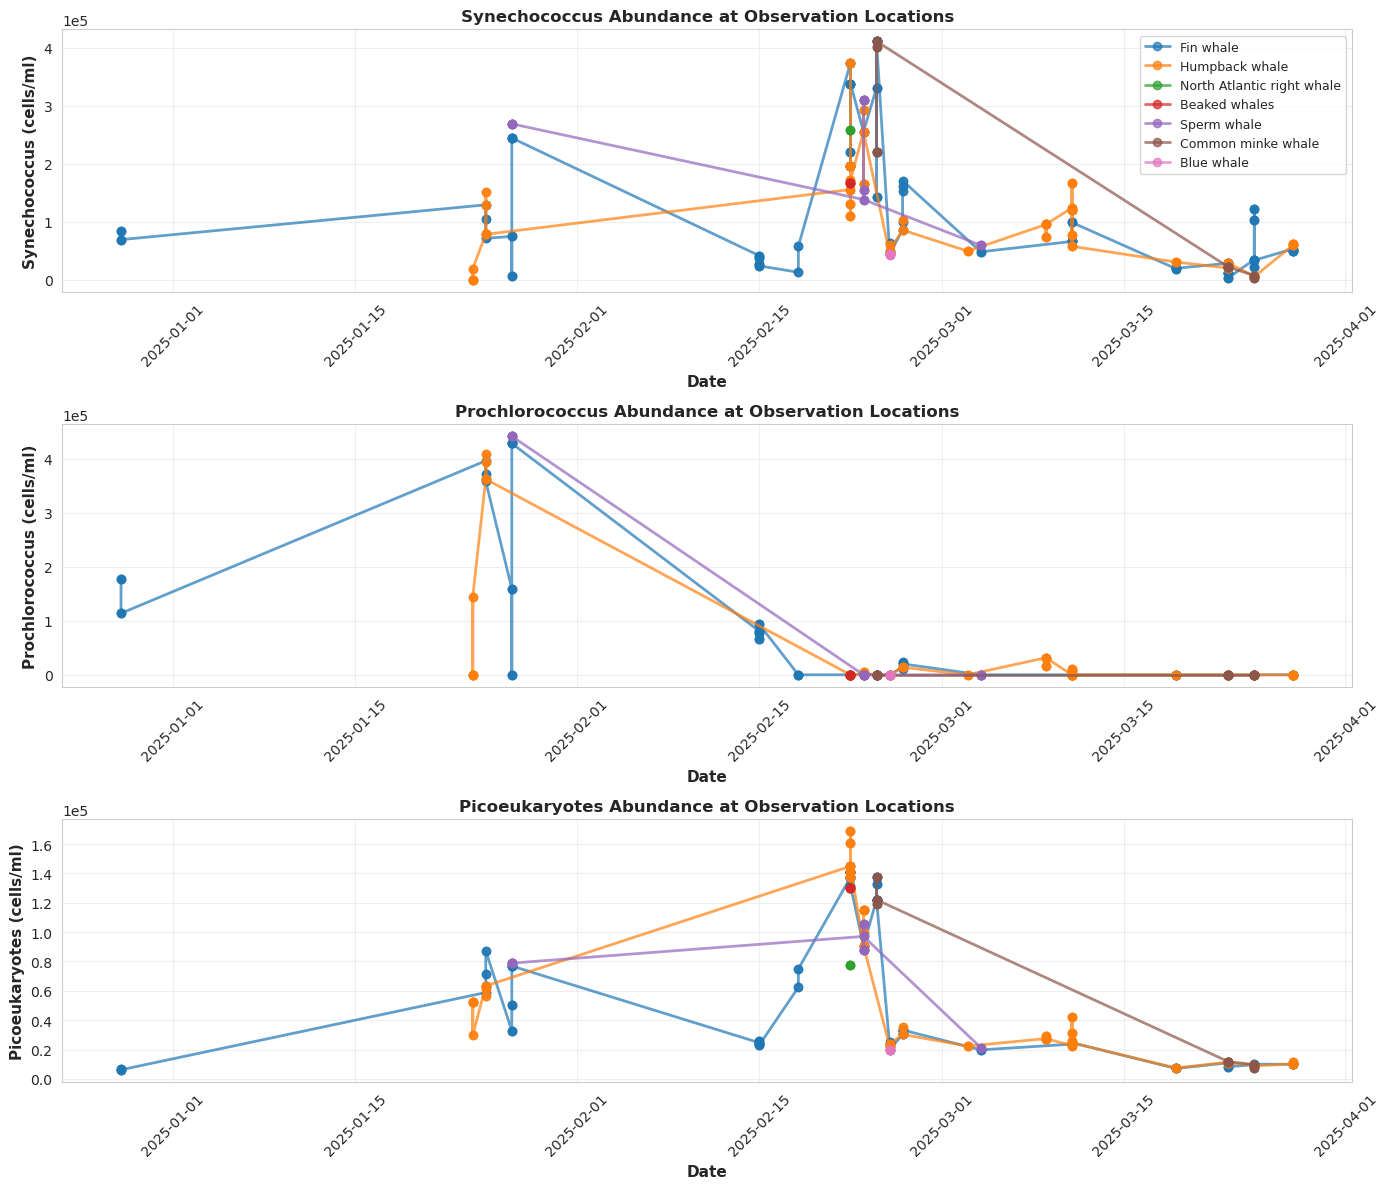

Creating box plots...


/tmp/ipykernel_3177/4012227712.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['common_name'] == species][var].dropna()
/tmp/ipykernel_3177/4012227712.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(info['color'])
/tmp/ipykernel_3177/4012227712.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['common_name'] == species][var].dropna()
/tmp/ipykernel_3177/4012227712.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Us

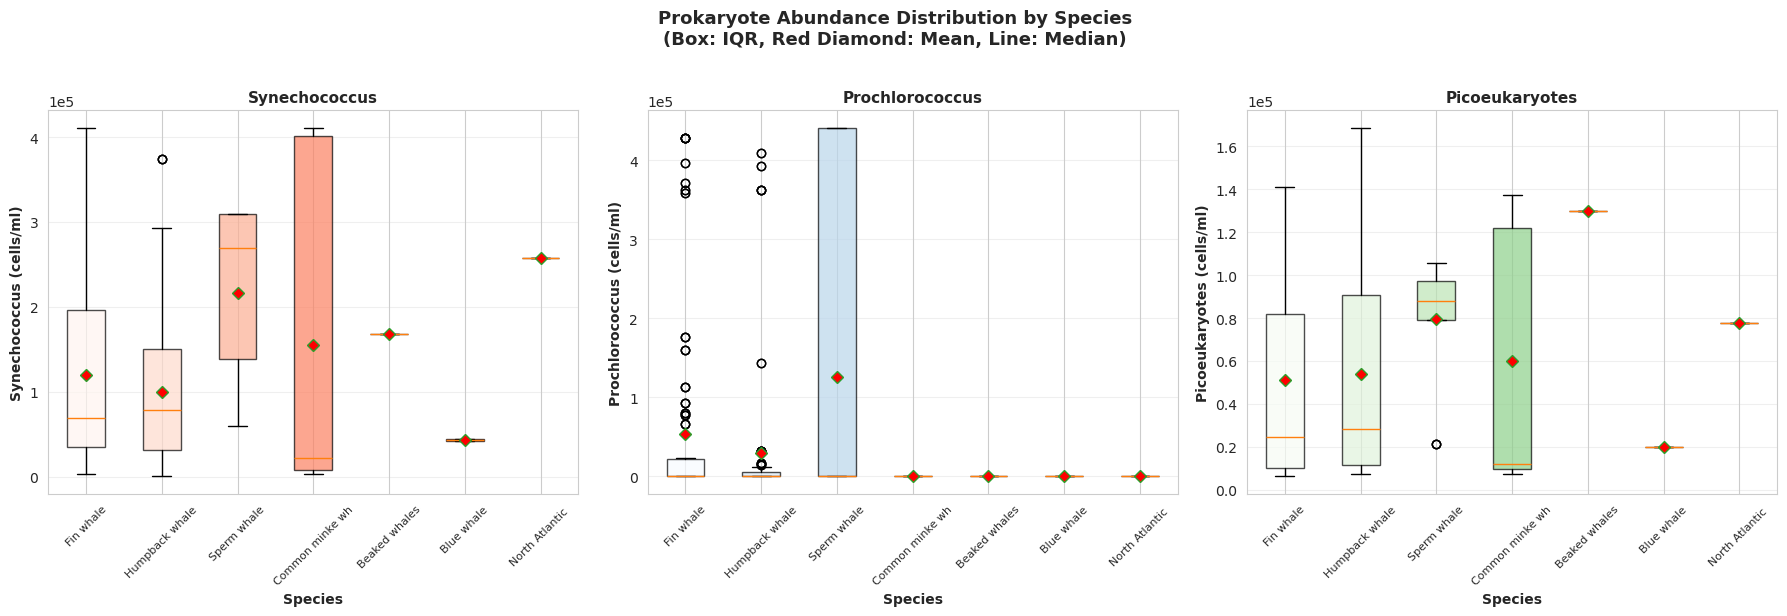

Creating violin plots...


/tmp/ipykernel_3177/4012227712.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
/tmp/ipykernel_3177/4012227712.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_3177/4012227712.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
/tmp/ipykernel_3177/4012227712.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_3177/4012227712.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

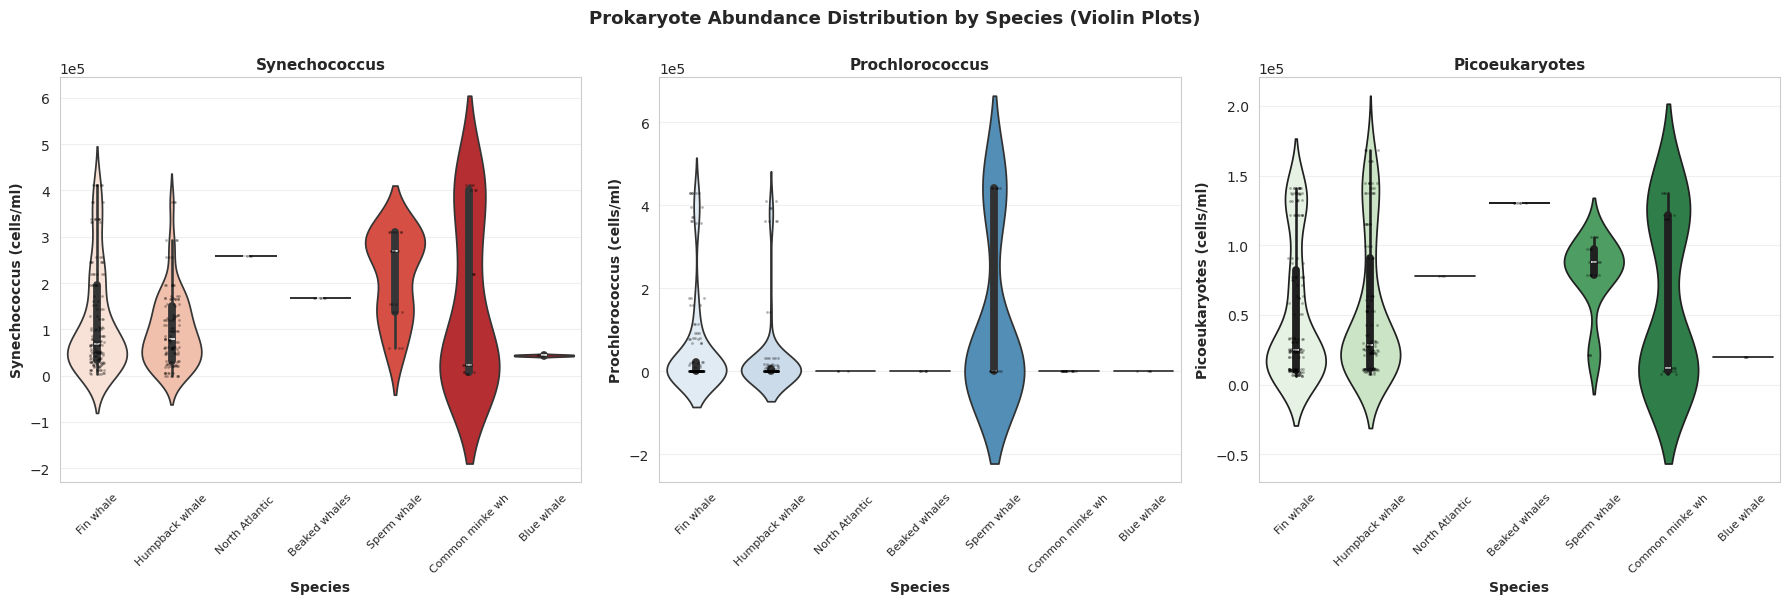

Creating species comparison plots...


/tmp/ipykernel_3177/4012227712.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df,
/tmp/ipykernel_3177/4012227712.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df,
/tmp/ipykernel_3177/4012227712.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df,
/tmp/ipykernel_3177/4012227712.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(da

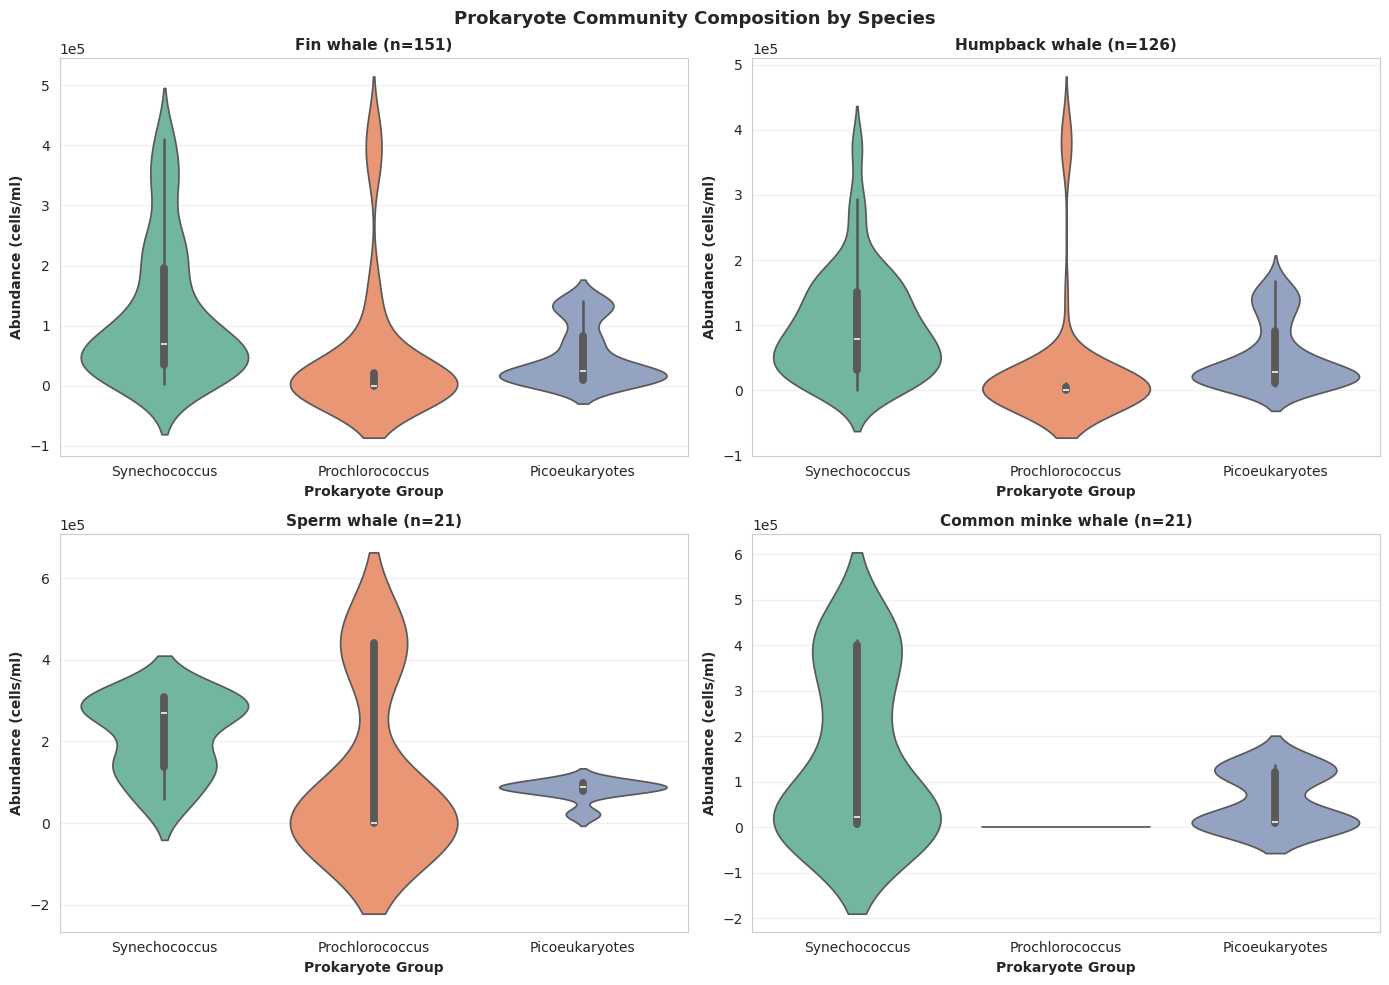

Creating heatmap...


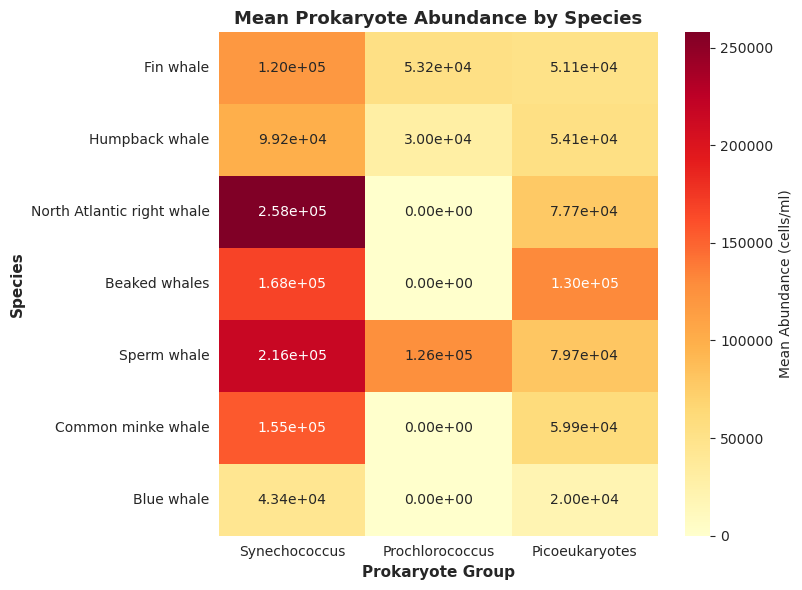

Creating correlation plots...


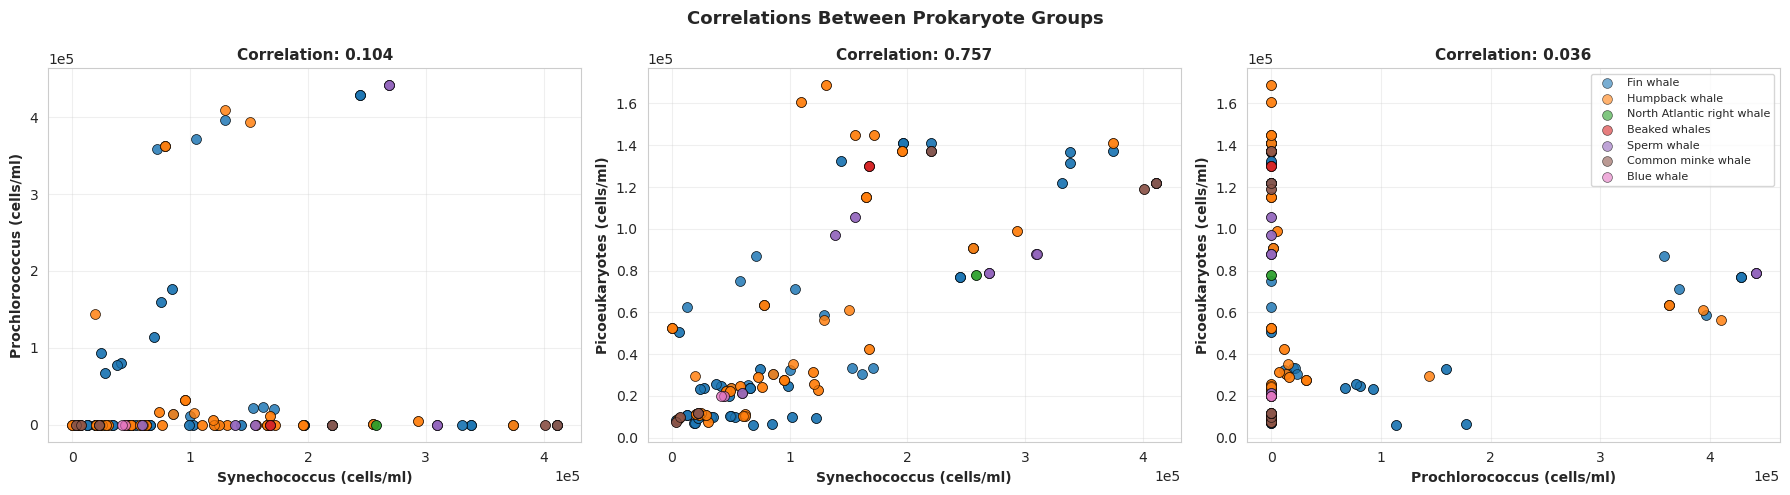


SUMMARY STATISTICS BY SPECIES

=== Synechococcus ===
                            Count           Mean    Median        Std Dev       Min       Max       25%       75%
common_name                                                                                                      
Beaked whales                   6  167582.000000  167582.0       0.000000  167582.0  167582.0  167582.0  167582.0
Blue whale                      4   43442.000000   43442.0    1521.895310   42124.0   44760.0   42124.0   44760.0
Common minke whale             21  155393.428571   22287.0  177703.827521    3423.0  411257.0    7246.0  401142.0
Fin whale                     151  119661.569536   69344.0  114504.749906    3389.0  411257.0   34317.5  196457.0
Humpback whale                124   99242.056452   78450.0   81807.400605      83.0  374045.0   30682.0  150832.0
North Atlantic right whale      3  257819.000000  257819.0       0.000000  257819.0  257819.0  257819.0  257819.0
Sperm whale                    21 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the combined data
df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_and_MOANA.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Loaded {len(df)} observations")
print(f"Columns: {df.columns.tolist()}")

# Set up plotting style
sns.set_style("whitegrid")

# Define MOANA variables to plot
moana_vars = {
    'synechococcus_median': {
        'label': 'Synechococcus (cells/ml)',
        'color': 'Reds',
        'title': 'Synechococcus'
    },
    'prochlorococcus_median': {
        'label': 'Prochlorococcus (cells/ml)',
        'color': 'Blues',
        'title': 'Prochlorococcus'
    },
    'picoeukaryotes_median': {
        'label': 'Picoeukaryotes (cells/ml)',
        'color': 'Greens',
        'title': 'Picoeukaryotes'
    }
}

# ===== PLOT 1: TIME SERIES - ALL MOANA VARIABLES IN ONE FIGURE =====
print("\nCreating time series plots...")

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, (var, info) in enumerate(moana_vars.items()):
    ax = axes[idx]
    
    # Plot each species
    for species in df['common_name'].unique():
        species_data = df[df['common_name'] == species].copy()
        species_data = species_data.sort_values('date')
        
        ax.plot(species_data['date'], 
                species_data[var], 
                'o-', 
                label=species, 
                alpha=0.7,
                markersize=6,
                linewidth=2)
    
    ax.set_xlabel('Date', fontsize=11, fontweight='bold')
    ax.set_ylabel(info['label'], fontsize=11, fontweight='bold')
    ax.set_title(f"{info['title']} Abundance at Observation Locations", 
                 fontsize=12, fontweight='bold')
    
    if idx == 0:  # Only show legend on first plot
        ax.legend(fontsize=9, loc='best')
    
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Format y-axis in scientific notation
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_timeseries_all.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 2: BOX PLOTS - FACETED BY MOANA VARIABLE =====
print("Creating box plots...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (var, info) in enumerate(moana_vars.items()):
    ax = axes[idx]
    
    # Get species order by count
    species_order = df['common_name'].value_counts().index.tolist()
    
    # Create box plot
    bp = ax.boxplot([df[df['common_name'] == species][var].dropna() 
                      for species in species_order],
                     labels=[s[:15] for s in species_order],  # Truncate long names
                     patch_artist=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=6))
    
    # Color the boxes using the specified colormap
    cmap = plt.cm.get_cmap(info['color'])
    colors = [cmap(i/len(species_order)) for i in range(len(species_order))]
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Species', fontsize=10, fontweight='bold')
    ax.set_ylabel(info['label'], fontsize=10, fontweight='bold')
    ax.set_title(info['title'], fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Format y-axis in scientific notation
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

plt.suptitle('Prokaryote Abundance Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_boxplots.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 3: VIOLIN PLOTS - FACETED BY MOANA VARIABLE =====
print("Creating violin plots...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (var, info) in enumerate(moana_vars.items()):
    ax = axes[idx]
    
    # Violin plot
    sns.violinplot(data=df, 
                   x='common_name', 
                   y=var,
                   palette=info['color'],
                   ax=ax)
    
    # Add individual points
    sns.stripplot(data=df, 
                  x='common_name', 
                  y=var,
                  color='black',
                  alpha=0.3,
                  size=2,
                  ax=ax)
    
    ax.set_xlabel('Species', fontsize=10, fontweight='bold')
    ax.set_ylabel(info['label'], fontsize=10, fontweight='bold')
    ax.set_title(info['title'], fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Format y-axis in scientific notation
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    
    # Shorten x-axis labels
    labels = [label.get_text()[:15] for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels)

plt.suptitle('Prokaryote Abundance Distribution by Species (Violin Plots)', 
             fontsize=13, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_violinplots.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 4: COMBINED COMPARISON - ALL VARIABLES FOR EACH SPECIES =====
print("Creating species comparison plots...")

# Get species with enough data
species_counts = df['common_name'].value_counts()
species_to_plot = species_counts[species_counts >= 5].index.tolist()[:4]  # Top 4 species

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, species in enumerate(species_to_plot):
    if idx < len(axes):
        ax = axes[idx]
        species_data = df[df['common_name'] == species]
        
        # Prepare data for plotting
        plot_data = []
        for var, info in moana_vars.items():
            for val in species_data[var].dropna():
                plot_data.append({
                    'Variable': info['title'],
                    'Abundance': val
                })
        
        plot_df = pd.DataFrame(plot_data)
        
        # Create violin plot
        sns.violinplot(data=plot_df, 
                      x='Variable', 
                      y='Abundance',
                      palette='Set2',
                      ax=ax)
        
        ax.set_title(f'{species} (n={len(species_data)})', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Prokaryote Group', fontsize=10, fontweight='bold')
        ax.set_ylabel('Abundance (cells/ml)', fontsize=10, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

plt.suptitle('Prokaryote Community Composition by Species', 
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_species_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 5: HEATMAP - SPECIES vs MOANA VARIABLES =====
print("Creating heatmap...")

# Calculate mean abundance for each species-variable combination
heatmap_data = []
for species in df['common_name'].unique():
    species_data = df[df['common_name'] == species]
    row = {'Species': species}
    for var, info in moana_vars.items():
        row[info['title']] = species_data[var].mean()
    heatmap_data.append(row)

heatmap_df = pd.DataFrame(heatmap_data)
heatmap_df = heatmap_df.set_index('Species')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(heatmap_df, 
            annot=True, 
            fmt='.2e',
            cmap='YlOrRd',
            cbar_kws={'label': 'Mean Abundance (cells/ml)'},
            ax=ax)

ax.set_title('Mean Prokaryote Abundance by Species', fontsize=13, fontweight='bold')
ax.set_xlabel('Prokaryote Group', fontsize=11, fontweight='bold')
ax.set_ylabel('Species', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_heatmap.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 6: CORRELATION BETWEEN MOANA VARIABLES =====
print("Creating correlation plots...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparisons = [
    ('synechococcus_median', 'prochlorococcus_median'),
    ('synechococcus_median', 'picoeukaryotes_median'),
    ('prochlorococcus_median', 'picoeukaryotes_median')
]

for idx, (var1, var2) in enumerate(comparisons):
    ax = axes[idx]
    
    # Scatter plot colored by species
    for species in df['common_name'].unique():
        species_data = df[df['common_name'] == species]
        ax.scatter(species_data[var1], 
                  species_data[var2],
                  alpha=0.6,
                  s=50,
                  label=species,
                  edgecolors='black',
                  linewidths=0.5)
    
    # Calculate correlation
    corr = df[[var1, var2]].corr().iloc[0, 1]
    
    ax.set_xlabel(moana_vars[var1]['title'] + ' (cells/ml)', fontsize=10, fontweight='bold')
    ax.set_ylabel(moana_vars[var2]['title'] + ' (cells/ml)', fontsize=10, fontweight='bold')
    ax.set_title(f'Correlation: {corr:.3f}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', scilimits=(0,0))
    
    if idx == 2:  # Only show legend on last plot
        ax.legend(fontsize=8, loc='best')

plt.suptitle('Correlations Between Prokaryote Groups', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_correlations.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== SUMMARY STATISTICS TABLE =====
print("\n" + "="*70)
print("SUMMARY STATISTICS BY SPECIES")
print("="*70)

for var, info in moana_vars.items():
    print(f"\n=== {info['title']} ===")
    summary = df.groupby('common_name')[var].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std Dev', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('25%', lambda x: x.quantile(0.25)),
        ('75%', lambda x: x.quantile(0.75))
    ])
    print(summary.to_string())
    
    # Save to CSV
    summary.to_csv(f'/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MOANA_{info["title"]}_summary_stats.csv')

print("\n✓ All MOANA plots created and saved!")

In this next section we will do the correlation test for all species of plankton and group size. 

# 2. Correlations: Group Size and Variables

Lets do a correlation between the values of chlorophyll and the group size of each observation. And also box plot for the group size values to see if anything there. 


Total observations for analysis: 330
Species found: ['Fin whale' 'Humpback whale' 'North Atlantic right whale' 'Beaked whales'
 'Sperm whale' 'Common minke whale' 'Blue whale']

CORRELATION ANALYSIS: Group Size vs Prokaryote Abundance

ANALYSIS: Group Size vs Synechococcus

Fin whale (n=151)
--------------------------------------------------
  Pearson correlation:  r = -0.225, p-value = 0.0055
  Spearman correlation: ρ = -0.200, p-value = 0.0138
  → Significant weak negative correlation (p < 0.05)

Humpback whale (n=124)
--------------------------------------------------
  Pearson correlation:  r = -0.151, p-value = 0.0939
  Spearman correlation: ρ = -0.198, p-value = 0.0279
  → Significant weak negative correlation (p < 0.05)

North Atlantic right whale (n=3)
--------------------------------------------------
  Pearson correlation:  r = nan, p-value = nan
  Spearman correlation: ρ = nan, p-value = nan
  → No significant correlation (p ≥ 0.05)

Beaked whales (n=6)
---------------------

/tmp/ipykernel_3177/3856430809.py:50: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = stats.pearsonr(species_data['group_size'],
/tmp/ipykernel_3177/3856430809.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = stats.spearmanr(species_data['group_size'],


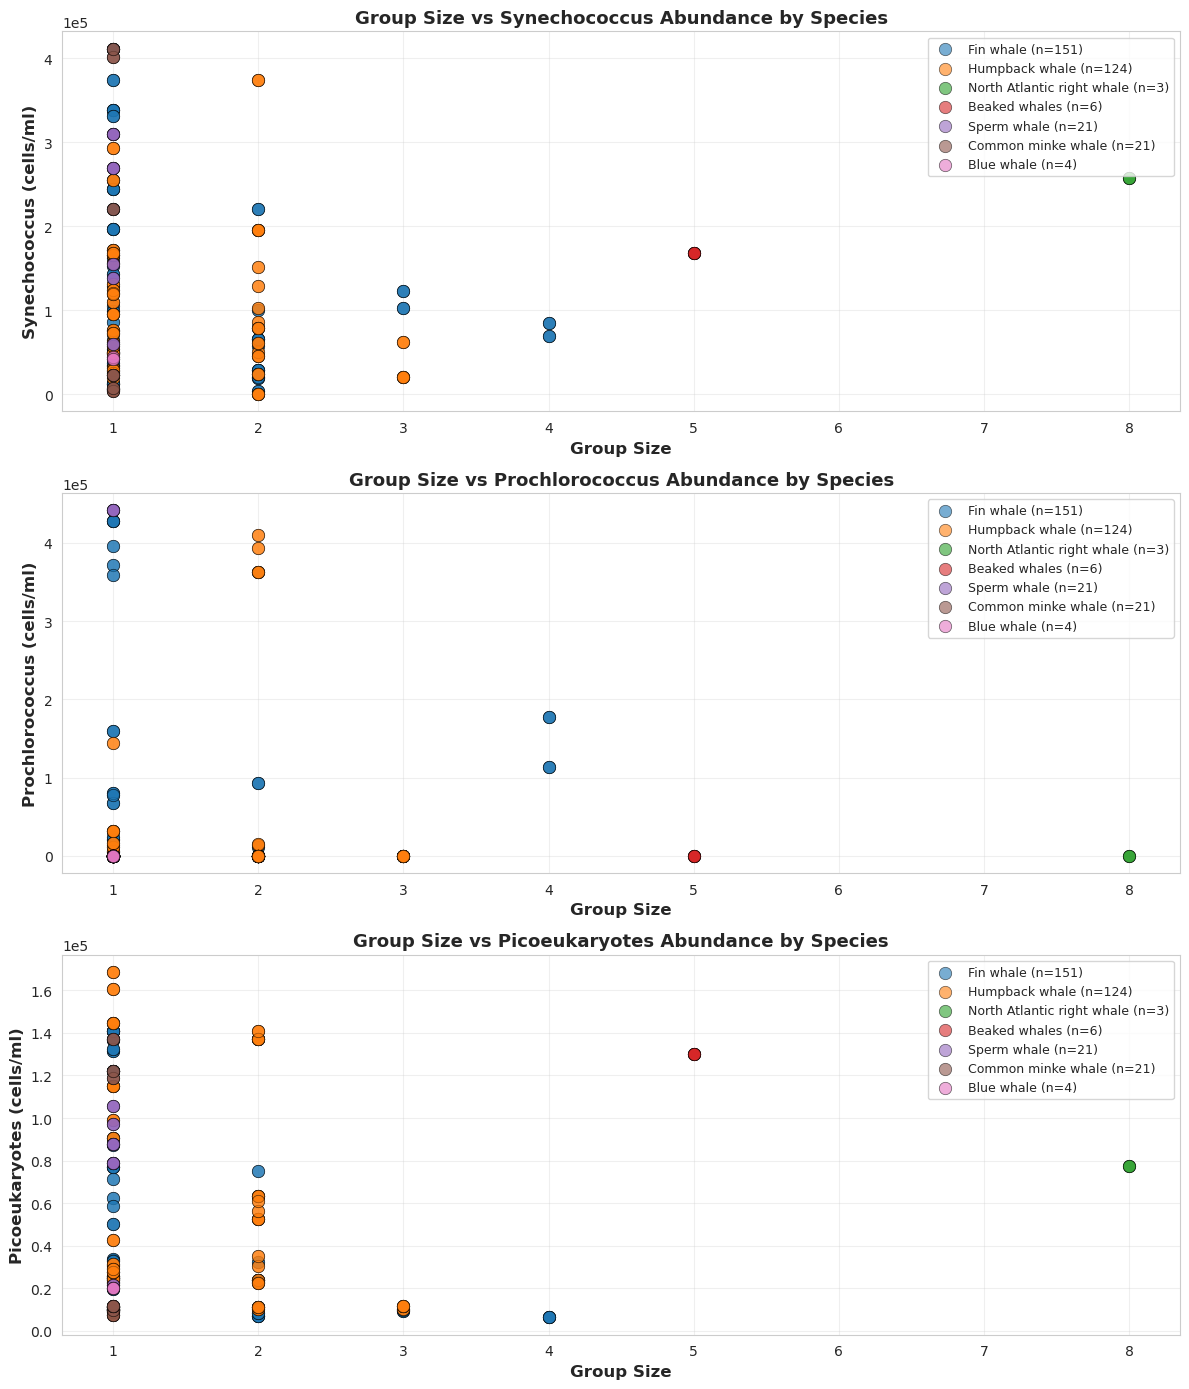

Creating box plots by group size category...


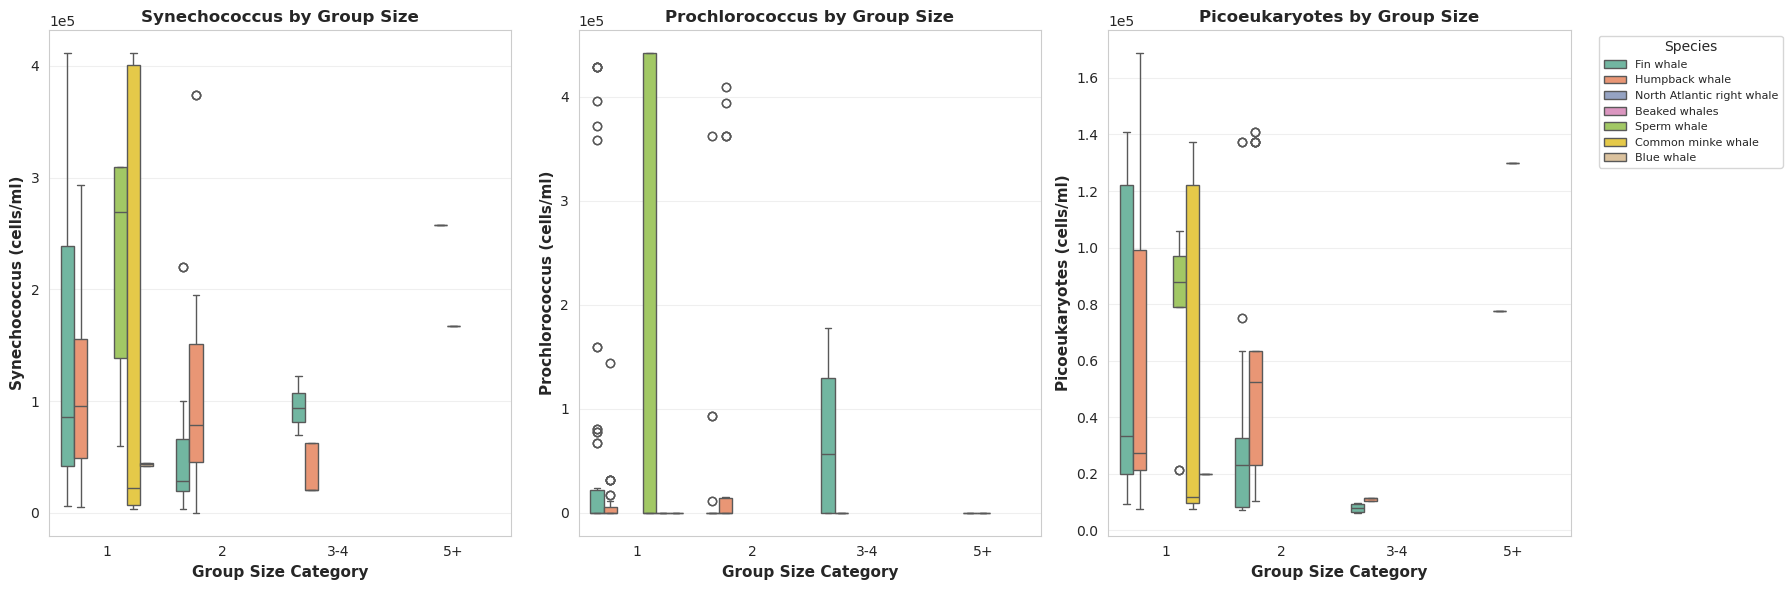

Creating correlation heatmap...


/tmp/ipykernel_3177/3856430809.py:164: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, _ = stats.spearmanr(species_data['group_size'], species_data[var])


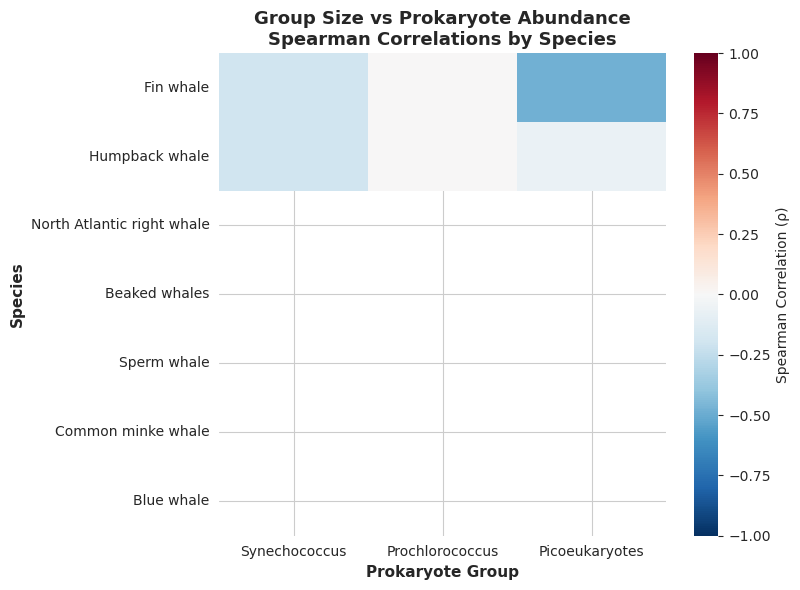


✓ All correlation analyses complete!


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load your data with MOANA variables
final_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_and_MOANA.csv')

# Remove any NaN values in group_size or MOANA variables
moana_vars = ['synechococcus_median', 'prochlorococcus_median', 'picoeukaryotes_median']
analysis_df = final_df[['common_name', 'group_size'] + moana_vars].dropna()

# Remove any observations with group_size = 0
analysis_df = analysis_df[analysis_df['group_size'] > 0]

print(f"Total observations for analysis: {len(analysis_df)}")
print(f"Species found: {analysis_df['common_name'].unique()}")

# ===== STATISTICAL ANALYSIS: CORRELATION BY SPECIES =====
print("\n" + "="*70)
print("CORRELATION ANALYSIS: Group Size vs Prokaryote Abundance")
print("="*70)

species_list = analysis_df['common_name'].unique()

# Dictionary to store all results
all_correlation_results = {
    'Synechococcus': [],
    'Prochlorococcus': [],
    'Picoeukaryotes': []
}

moana_var_names = {
    'synechococcus_median': 'Synechococcus',
    'prochlorococcus_median': 'Prochlorococcus',
    'picoeukaryotes_median': 'Picoeukaryotes'
}

for var, var_name in moana_var_names.items():
    print(f"\n{'='*70}")
    print(f"ANALYSIS: Group Size vs {var_name}")
    print('='*70)
    
    for species in species_list:
        species_data = analysis_df[analysis_df['common_name'] == species]
        
        if len(species_data) > 2:
            # Pearson correlation (linear relationship)
            pearson_r, pearson_p = stats.pearsonr(species_data['group_size'], 
                                                   species_data[var])
            
            # Spearman correlation (monotonic relationship, better for discrete group sizes)
            spearman_r, spearman_p = stats.spearmanr(species_data['group_size'], 
                                                      species_data[var])
            
            print(f"\n{species} (n={len(species_data)})")
            print("-" * 50)
            print(f"  Pearson correlation:  r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")
            print(f"  Spearman correlation: ρ = {spearman_r:.3f}, p-value = {spearman_p:.4f}")
            
            # Interpretation
            if spearman_p < 0.05:
                direction = "positive" if spearman_r > 0 else "negative"
                strength = "strong" if abs(spearman_r) > 0.5 else "moderate" if abs(spearman_r) > 0.3 else "weak"
                print(f"  → Significant {strength} {direction} correlation (p < 0.05)")
            else:
                print(f"  → No significant correlation (p ≥ 0.05)")
            
            all_correlation_results[var_name].append({
                'Species': species,
                'N': len(species_data),
                'Pearson_r': pearson_r,
                'Pearson_p': pearson_p,
                'Spearman_rho': spearman_r,
                'Spearman_p': spearman_p
            })

# Save correlation results for each variable
for var_name, results in all_correlation_results.items():
    if results:
        corr_df = pd.DataFrame(results)
        filename = f'/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_{var_name}_correlations.csv'
        corr_df.to_csv(filename, index=False)
        print(f"\n✓ {var_name} correlation results saved")

# ===== PLOT 1: Scatter Plots - Group Size vs Each Prokaryote (Faceted by Species) =====
print("\nCreating scatter plots...")

fig, axes = plt.subplots(3, 1, figsize=(12, 14))

for idx, (var, var_name) in enumerate(moana_var_names.items()):
    ax = axes[idx]
    
    # Plot each species
    for species in species_list:
        species_data = analysis_df[analysis_df['common_name'] == species]
        ax.scatter(species_data['group_size'], 
                  species_data[var],
                  alpha=0.6,
                  s=80,
                  label=f"{species} (n={len(species_data)})",
                  edgecolors='black',
                  linewidths=0.5)
    
    ax.set_xlabel('Group Size', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{var_name} (cells/ml)', fontsize=12, fontweight='bold')
    ax.set_title(f'Group Size vs {var_name} Abundance by Species', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_MOANA_scatter.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 2: Box Plots by Group Size Category =====
print("Creating box plots by group size category...")

# Bin group sizes
analysis_df['group_size_category'] = pd.cut(analysis_df['group_size'], 
                                             bins=[0, 1, 2, 4, 100],
                                             labels=['1', '2', '3-4', '5+'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (var, var_name) in enumerate(moana_var_names.items()):
    ax = axes[idx]
    
    sns.boxplot(data=analysis_df, 
                x='group_size_category', 
                y=var,
                hue='common_name',
                palette='Set2',
                ax=ax)
    
    ax.set_xlabel('Group Size Category', fontsize=11, fontweight='bold')
    ax.set_ylabel(f'{var_name} (cells/ml)', fontsize=11, fontweight='bold')
    ax.set_title(f'{var_name} by Group Size', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    
    if idx == 2:  # Only show legend on last panel
        ax.legend(title='Species', fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_categories_MOANA.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 3: Heatmap of Correlations =====
print("Creating correlation heatmap...")

# Calculate correlations for each species-variable combination
heatmap_data = []
for species in species_list:
    species_data = analysis_df[analysis_df['common_name'] == species]
    if len(species_data) > 2:
        row = {'Species': species}
        for var, var_name in moana_var_names.items():
            spearman_r, _ = stats.spearmanr(species_data['group_size'], species_data[var])
            row[var_name] = spearman_r
        heatmap_data.append(row)

if heatmap_data:
    heatmap_df = pd.DataFrame(heatmap_data)
    heatmap_df = heatmap_df.set_index('Species')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(heatmap_df, 
                fmt='.3f',
                cmap='RdBu_r',
                center=0,
                vmin=-1,
                vmax=1,
                cbar_kws={'label': 'Spearman Correlation (ρ)'},
                ax=ax)
    
    ax.set_title('Group Size vs Prokaryote Abundance\nSpearman Correlations by Species', 
                fontsize=13, fontweight='bold')
    ax.set_xlabel('Prokaryote Group', fontsize=11, fontweight='bold')
    ax.set_ylabel('Species', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_MOANA_correlation_heatmap.png',
                dpi=300, bbox_inches='tight')
    plt.show()

print("\n✓ All correlation analyses complete!")

## 3. Adding Bathymetry Data
Let's start by loading the GEBCO data and extracting it

In [20]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== LOAD GEBCO BATHYMETRY DATA =====
print("="*70)
print("LOADING GEBCO BATHYMETRY DATA")
print("="*70)

gebco_file = '/home/jovyan/2026_proj_megafauna/data/gebco_2025_n42.0_s35.0_w-78.0_e-71.0.nc'

# Load the bathymetry data
bathy = xr.open_dataset(gebco_file)

print("\nDataset structure:")
print(bathy)

print("\nVariables available:")
print(bathy.data_vars)

print("\nCoordinates:")
print(f"Latitude range: {bathy.lat.min().values:.2f} to {bathy.lat.max().values:.2f}")
print(f"Longitude range: {bathy.lon.min().values:.2f} to {bathy.lon.max().values:.2f}")

# Check variable name (GEBCO typically uses 'elevation' where negative = depth)
if 'elevation' in bathy.variables:
    depth_var = 'elevation'
    print(f"\nUsing variable: '{depth_var}'")
    print(f"Elevation range: {bathy[depth_var].min().values:.1f} to {bathy[depth_var].max().values:.1f} meters")
    print("(Negative values = depth below sea level)")
elif 'depth' in bathy.variables:
    depth_var = 'depth'
    print(f"\nUsing variable: '{depth_var}'")
else:
    print("\nAvailable variables:", list(bathy.variables))
    depth_var = input("Enter the depth/elevation variable name: ")

# ===== VISUALIZE BATHYMETRY =====
print("\nCreating bathymetry overview map...")

fig, ax = plt.subplots(figsize=(12, 10))

# Plot bathymetry (use absolute value for depth, or negative elevation)
# GEBCO elevation: negative = below sea level (depth)
bathy_plot = bathy[depth_var].plot(
    ax=ax,
    cmap='terrain',  # Good for bathymetry
    robust=True,
    cbar_kwargs={'label': 'Elevation (m)\n(Negative = Depth)'}
)

ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
ax.set_title('GEBCO Bathymetry - Study Area', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Bathymetry_Overview.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Bathymetry overview saved!")

LOADING GEBCO BATHYMETRY DATA


FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/2026_proj_megafauna/data/gebco_2025_n42.0_s35.0_w-78.0_e-71.0.nc'

Now we will extract the depths by observation and append to the other dataset. 

In [ ]:
# ===== LOAD OBSERVATION DATA =====
print("\n" + "="*70)
print("LOADING OBSERVATION DATA")
print("="*70)

# Load the existing chlorophyll + MOANA data
obs_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_and_MOANA.csv')

print(f"Loaded {len(obs_df)} observations")
print(f"Date range: {obs_df['date_time'].min()} to {obs_df['date_time'].max()}")

# ===== EXTRACT DEPTH AT EACH OBSERVATION POINT =====
print("\n" + "="*70)
print("EXTRACTING DEPTH AT OBSERVATION POINTS")
print("="*70)

from tqdm import tqdm

depth_values = []

for idx, row in tqdm(obs_df.iterrows(), total=len(obs_df), desc="Extracting depth"):
    lat = row['latitude']
    lon = row['longitude']
    
    # Find nearest grid point in bathymetry data
    # Use .sel() with method='nearest' for quick nearest-neighbor lookup
    try:
        depth_point = bathy[depth_var].sel(lat=lat, lon=lon, method='nearest').values
        
        # GEBCO elevation: negative values = depth below sea level
        # Convert to positive depth (traditional oceanographic convention)
        if depth_point <= 0:  # Below sea level
            depth_m = -float(depth_point)  # Make positive (depth)
        else:  # Above sea level (shouldn't happen for marine mammals)
            depth_m = 0.0  # Set to 0 if on land
        
        depth_values.append(depth_m)
        
    except Exception as e:
        print(f"Error at index {idx} (lat={lat}, lon={lon}): {e}")
        depth_values.append(np.nan)

# Add depth to dataframe
obs_df['depth_m'] = depth_values

# Summary statistics
print("\n" + "="*70)
print("DEPTH EXTRACTION SUMMARY")
print("="*70)
print(f"\nDepth statistics (all observations):")
print(f"  Mean depth: {obs_df['depth_m'].mean():.1f} m")
print(f"  Median depth: {obs_df['depth_m'].median():.1f} m")
print(f"  Min depth: {obs_df['depth_m'].min():.1f} m")
print(f"  Max depth: {obs_df['depth_m'].max():.1f} m")
print(f"  Std dev: {obs_df['depth_m'].std():.1f} m")

print(f"\nObservations with missing depth: {obs_df['depth_m'].isnull().sum()}")

# Summary by species
print("\n" + "="*70)
print("DEPTH SUMMARY BY SPECIES")
print("="*70)
depth_by_species = obs_df.groupby('common_name')['depth_m'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(1)
print(depth_by_species)

# Save updated dataframe
output_file = '/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_MOANA_Depth.csv'
obs_df.to_csv(output_file, index=False)

print(f"\n✓ Updated data saved to: {output_file}")
print(f"✓ Total columns: {len(obs_df.columns)}")

Visualizing the depth distribution

In [ ]:
# ===== PLOT 1: BOX PLOT BY SPECIES =====
print("\n" + "="*70)
print("CREATING DEPTH VISUALIZATIONS")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 7))

# Get species order by sample size
species_order = obs_df['common_name'].value_counts().index.tolist()

# Create box plot
bp = ax.boxplot([obs_df[obs_df['common_name'] == species]['depth_m'].dropna() 
                  for species in species_order],
                 labels=[s[:20] for s in species_order],  # Truncate long names
                 patch_artist=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = sns.color_palette("Set2", len(species_order))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Depth (m)', fontsize=12, fontweight='bold')
ax.set_title('Water Depth Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

# Invert y-axis (oceanographic convention: depth increases downward)
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Depth_Distribution_BoxPlot.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 2: VIOLIN PLOT =====
fig, ax = plt.subplots(figsize=(12, 7))

sns.violinplot(data=obs_df, 
               x='common_name', 
               y='depth_m',
               palette='Set2',
               ax=ax)

# Add individual points
sns.stripplot(data=obs_df, 
              x='common_name', 
              y='depth_m',
              color='black',
              alpha=0.3,
              size=3,
              ax=ax)

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Depth (m)', fontsize=12, fontweight='bold')
ax.set_title('Water Depth Distribution by Species (Violin Plot)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
ax.invert_yaxis()

# Shorten x-axis labels
labels = [label.get_text()[:20] for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Depth_Distribution_ViolinPlot.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 3: DEPTH HISTOGRAM BY SPECIES =====
fig, ax = plt.subplots(figsize=(12, 7))

for species in species_order:
    species_data = obs_df[obs_df['common_name'] == species]['depth_m'].dropna()
    ax.hist(species_data, alpha=0.6, label=f"{species} (n={len(species_data)})", 
            bins=20, edgecolor='black')

ax.set_xlabel('Depth (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Depth Distribution Histogram by Species', fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Depth_Histogram.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 4: DEPTH CATEGORIES =====
# Categorize by depth zones
obs_df['depth_category'] = pd.cut(obs_df['depth_m'], 
                                   bins=[0, 50, 200, 1000, 5000],
                                   labels=['Shallow (<50m)', 'Shelf (50-200m)', 
                                          'Slope (200-1000m)', 'Deep (>1000m)'])

fig, ax = plt.subplots(figsize=(10, 7))

# Count by category and species
depth_cat_counts = obs_df.groupby(['common_name', 'depth_category']).size().unstack(fill_value=0)

depth_cat_counts.plot(kind='bar', stacked=True, ax=ax, 
                      color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'],
                      alpha=0.8, edgecolor='black')

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Observations', fontsize=12, fontweight='bold')
ax.set_title('Observations by Depth Category and Species', fontsize=14, fontweight='bold')
ax.legend(title='Depth Zone', fontsize=10, title_fontsize=11)
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Depth_Categories.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All depth visualizations created!")

Now can plot the depth on map

In [ ]:
# ===== PLOT 5: OBSERVATIONS OVERLAID ON BATHYMETRY =====
print("\nCreating bathymetry map with observations...")

fig, ax = plt.subplots(figsize=(14, 12))

# Plot bathymetry background
bathy[depth_var].plot(
    ax=ax,
    cmap='terrain',
    robust=True,
    alpha=0.7,
    add_colorbar=False
)

# Add custom colorbar
from matplotlib import cm
from matplotlib.colors import Normalize

norm = Normalize(vmin=bathy[depth_var].min(), vmax=bathy[depth_var].max())
sm = cm.ScalarMappable(norm=norm, cmap='terrain')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label('Elevation (m)\n(Negative = Depth)', fontsize=11, fontweight='bold')

# Overlay observations colored by species
species_colors = {
    'Fin whale': '#e41a1c',
    'Humpback whale': '#377eb8',
    'Common minke whale': '#4daf4a',
    'Sperm whale': '#984ea3',
    'North Atlantic right whale': '#ff7f00',
    'Blue whale': '#ffff33',
    'Beaked whales': '#a65628'
}

for species in obs_df['common_name'].unique():
    species_data = obs_df[obs_df['common_name'] == species]
    color = species_colors.get(species, 'black')
    
    ax.scatter(species_data['longitude'], 
              species_data['latitude'],
              c=color,
              s=60,
              alpha=0.7,
              edgecolors='white',
              linewidths=1,
              label=f"{species} (n={len(species_data)})",
              zorder=5)

ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
ax.set_title('Marine Mammal Observations on Bathymetry\nMid-Atlantic Bight', 
            fontsize=14, fontweight='bold')
ax.legend(loc='lower left', fontsize=9, framealpha=0.95, edgecolor='black')
ax.grid(True, alpha=0.3, color='white', linewidth=0.5)

# Add shelf break contour (200m)
try:
    contour = ax.contour(bathy.lon, bathy.lat, bathy[depth_var], 
                        levels=[-200], colors='red', linewidths=2, linestyles='--')
    ax.clabel(contour, inline=True, fontsize=10, fmt='200m shelf break')
except:
    print("Could not add 200m contour")

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Observations_on_Bathymetry.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Bathymetry map with observations created!")

Carbon Data: Check to see if it is good. 

In [ ]:
import pandas as pd

# Load the new dataset with carbon
df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Carbon_Chl_MOANA_Depth.csv')

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nTotal observations: {len(df)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print("\n" + "="*70)
print("CARBON VARIABLES DETECTED")
print("="*70)

# Find carbon-related columns
carbon_cols = [col for col in df.columns if 'carbon' in col.lower() or 'poc' in col.lower() or 'pic' in col.lower()]

if carbon_cols:
    print(f"\nFound {len(carbon_cols)} carbon variable(s):")
    for col in carbon_cols:
        print(f"\n  {col}:")
        print(f"    - Mean: {df[col].mean():.4f}")
        print(f"    - Median: {df[col].median():.4f}")
        print(f"    - Min: {df[col].min():.4f}")
        print(f"    - Max: {df[col].max():.4f}")
        print(f"    - Missing: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
else:
    print("\nNo carbon variables found with standard naming")
    print("\nShowing sample of first few rows:")
    print(df.head())

## 4. Environmental Niche Comparison
The Environmental Niche Comparison quantifies whether different marine mammal species occupy distinct ecological niches by comparing the environmental conditions (chlorophyll concentration, chlorophyll variability, and geographic location) at observation sites. The analysis produces distribution histograms showing the frequency of observations across environmental gradients for each species, statistical tests (Kruskal-Wallis) to determine if species differ significantly in their habitat use, and niche overlap metrics (Pianka's index, 0-1 scale) that quantify how much species' environmental preferences overlap. High niche overlap (>0.7) suggests species are ecological generalists using similar habitats and may compete for resources, while low overlap (<0.4) indicates niche partitioning where species specialize in different conditions, reducing competition. The environmental space plots reveal whether species cluster in different regions of chlorophyll-latitude space, indicating habitat specialization, or if they overlap broadly, suggesting opportunistic habitat use. This analysis directly addresses whether marine mammal species in your study area are responding to environmental gradients in species-specific ways (requiring separate conservation strategies) or if they function as a generalized "marine mammal community" with similar habitat requirements (allowing for unified management approaches). The results provide the ecological justification for whether subsequent analyses should be species-specific or can be conducted on pooled data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal
from tqdm import tqdm

# Load your data with carbon
df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Carbon_Chl_MOANA_Depth.csv')

# Define environmental variables INCLUDING CARBON
# Adjust the carbon variable names based on what's actually in your data
environmental_vars = {
    'chlor_a_median': 'Chlorophyll-a',
    'chlor_a_std': 'Chlorophyll Variability',
    'synechococcus_median': 'Synechococcus',
    'prochlorococcus_median': 'Prochlorococcus',
    'picoeukaryotes_median': 'Picoeukaryotes',
    'depth_m': 'Water Depth',
    'latitude': 'Latitude',
    # Add carbon variables - adjust names as needed
    'carbon_phyto_median': 'Particulate Organic Carbon',  # Common variable names
    # If you have other carbon metrics, add them here:
    # 'pic_median': 'Particulate Inorganic Carbon',
    # 'carbon_median': 'Total Carbon',
}

# Clean data - remove rows with any missing values
df_clean = df[list(environmental_vars.keys()) + ['common_name']].dropna()

print("="*70)
print("MULTI-VARIABLE ENVIRONMENTAL NICHE ANALYSIS (WITH CARBON)")
print("="*70)
print(f"\nTotal observations with complete data: {len(df_clean)}")
print(f"Species: {df_clean['common_name'].unique()}")

# Check data loss
print(f"\nData completeness:")
print(f"  Original observations: {len(df)}")
print(f"  After removing missing values: {len(df_clean)}")
print(f"  Data retention: {len(df_clean)/len(df)*100:.1f}%")

# ===== SUMMARY STATISTICS BY SPECIES =====
print("\n" + "="*70)
print("ENVIRONMENTAL CONDITIONS BY SPECIES (INCLUDING CARBON)")
print("="*70)

summary_stats = []
for species in df_clean['common_name'].unique():
    species_data = df_clean[df_clean['common_name'] == species]
    
    stats_row = {'Species': species, 'N': len(species_data)}
    
    for var, label in environmental_vars.items():
        stats_row[f'{label}_mean'] = species_data[var].mean()
        stats_row[f'{label}_std'] = species_data[var].std()
    
    summary_stats.append(stats_row)

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MultiVar_Species_Summary_With_Carbon.csv', 
                  index=False)

# ===== STATISTICAL TESTS =====
print("\n" + "="*70)
print("STATISTICAL TESTS: Do species differ in environmental use?")
print("="*70)

species_list = df_clean['common_name'].unique()

test_results = []

for var, label in environmental_vars.items():
    groups = [df_clean[df_clean['common_name'] == sp][var].values 
              for sp in species_list]
    
    # Remove groups with too few observations
    groups = [g for g in groups if len(g) >= 3]
    
    if len(groups) >= 2:
        h_stat, p_val = kruskal(*groups)
        
        print(f"\n{label}:")
        print(f"  H-statistic: {h_stat:.3f}")
        print(f"  p-value: {p_val:.4f}")
        
        if p_val < 0.05:
            print(f"  → Species differ significantly (p < 0.05) ✓")
            significant = 'Yes'
        else:
            print(f"  → No significant difference (p ≥ 0.05)")
            significant = 'No'
        
        test_results.append({
            'Variable': label,
            'H_statistic': h_stat,
            'p_value': p_val,
            'Significant': significant
        })

# Save test results
test_results_df = pd.DataFrame(test_results)
test_results_df.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Statistical_Tests_With_Carbon.csv',
                        index=False)
print("\n✓ Statistical test results saved")

# ===== VISUALIZATION 1: Multi-panel Environmental Distributions =====
print("\nCreating environmental distribution plots...")

n_vars = len(environmental_vars)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(species_list))

for idx, (var, label) in enumerate(environmental_vars.items()):
    ax = axes[idx]
    
    for species, color in zip(species_list, colors):
        data = df_clean[df_clean['common_name'] == species][var]
        if len(data) > 0:
            ax.hist(data, alpha=0.6, label=species, bins=15, 
                   color=color, edgecolor='black', density=True)
    
    ax.set_xlabel(label, fontweight='bold', fontsize=11)
    ax.set_ylabel('Density', fontweight='bold', fontsize=11)
    ax.set_title(label, fontweight='bold', fontsize=12)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Special formatting
    if 'coccus' in var or 'euk' in var:
        ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
    elif var == 'depth_m':
        ax.invert_xaxis()

# Hide extra subplots
for idx in range(len(environmental_vars), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Environmental Niche Distributions by Species (With Carbon)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MultiVar_Environmental_Distributions_With_Carbon.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Distribution plots complete")

# ===== VISUALIZATION 2: Carbon-Specific Analysis =====
print("Creating carbon-specific visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Find carbon variable
carbon_var = [var for var in environmental_vars.keys() if 'carbon' in var.lower() or 'poc' in var.lower()][0]
carbon_label = environmental_vars[carbon_var]

# Plot 1: Box plot by species
ax1 = axes[0, 0]
species_order = df_clean['common_name'].value_counts().index.tolist()
bp = ax1.boxplot([df_clean[df_clean['common_name'] == species][carbon_var].dropna() 
                   for species in species_order],
                  labels=[s[:15] for s in species_order],
                  patch_artist=True,
                  showmeans=True,
                  meanprops=dict(marker='D', markerfacecolor='red', markersize=6))

for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_ylabel(carbon_label, fontweight='bold', fontsize=11)
ax1.set_title(f'{carbon_label} Distribution by Species', fontweight='bold', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Carbon vs Chlorophyll
ax2 = axes[0, 1]
for species, color in zip(species_list, colors):
    species_data = df_clean[df_clean['common_name'] == species]
    ax2.scatter(species_data['chlor_a_median'], 
               species_data[carbon_var],
               alpha=0.6, s=60, label=species, color=color,
               edgecolors='black', linewidths=0.5)

ax2.set_xlabel('Chlorophyll-a (mg/m³)', fontweight='bold', fontsize=11)
ax2.set_ylabel(carbon_label, fontweight='bold', fontsize=11)
ax2.set_title('Carbon vs Chlorophyll', fontweight='bold', fontsize=12)
ax2.legend(fontsize=8, loc='best')
ax2.grid(True, alpha=0.3)

# Plot 3: Carbon vs Depth
ax3 = axes[1, 0]
for species, color in zip(species_list, colors):
    species_data = df_clean[df_clean['common_name'] == species]
    ax3.scatter(species_data[carbon_var],
               species_data['depth_m'],
               alpha=0.6, s=60, label=species, color=color,
               edgecolors='black', linewidths=0.5)

ax3.set_xlabel(carbon_label, fontweight='bold', fontsize=11)
ax3.set_ylabel('Depth (m)', fontweight='bold', fontsize=11)
ax3.set_title('Carbon vs Depth', fontweight='bold', fontsize=12)
ax3.legend(fontsize=8, loc='best')
ax3.grid(True, alpha=0.3)
ax3.invert_yaxis()

# Plot 4: Carbon vs Synechococcus
ax4 = axes[1, 1]
for species, color in zip(species_list, colors):
    species_data = df_clean[df_clean['common_name'] == species]
    ax4.scatter(species_data['synechococcus_median'],
               species_data[carbon_var],
               alpha=0.6, s=60, label=species, color=color,
               edgecolors='black', linewidths=0.5)

ax4.set_xlabel('Synechococcus (cells/ml)', fontweight='bold', fontsize=11)
ax4.set_ylabel(carbon_label, fontweight='bold', fontsize=11)
ax4.set_title('Carbon vs Synechococcus', fontweight='bold', fontsize=12)
ax4.legend(fontsize=8, loc='best')
ax4.grid(True, alpha=0.3)
ax4.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

plt.suptitle('Carbon Analysis by Species', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Carbon_Analysis_Comprehensive.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Carbon-specific plots complete")

# ===== VISUALIZATION 3: Extended Environmental Space Plots =====
print("Creating 2D environmental space plots with carbon...")

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Define interesting variable pairs - INCLUDE CARBON
comparisons = [
    ('depth_m', 'synechococcus_median', 'Depth vs Synechococcus'),
    ('depth_m', 'prochlorococcus_median', 'Depth vs Prochlorococcus'),
    ('depth_m', 'picoeukaryotes_median', 'Depth vs Picoeukaryotes'),
    ('depth_m', carbon_var, f'Depth vs {carbon_label}'),
    ('chlor_a_median', 'synechococcus_median', 'Chlorophyll vs Synechococcus'),
    ('chlor_a_median', carbon_var, f'Chlorophyll vs {carbon_label}'),
    (carbon_var, 'synechococcus_median', f'{carbon_label} vs Synechococcus'),
    (carbon_var, 'prochlorococcus_median', f'{carbon_label} vs Prochlorococcus'),
    (carbon_var, 'picoeukaryotes_median', f'{carbon_label} vs Picoeukaryotes'),
    ('synechococcus_median', 'prochlorococcus_median', 'Synechococcus vs Prochlorococcus'),
    ('chlor_a_median', 'latitude', 'Chlorophyll vs Latitude'),
    (carbon_var, 'latitude', f'{carbon_label} vs Latitude')
]

for idx, (var1, var2, title) in enumerate(comparisons):
    ax = axes.flatten()[idx]
    
    for species, color in zip(species_list, colors):
        species_data = df_clean[df_clean['common_name'] == species]
        ax.scatter(species_data[var1], 
                  species_data[var2],
                  alpha=0.6, s=60, label=species, color=color,
                  edgecolors='black', linewidths=0.5)
    
    ax.set_xlabel(environmental_vars.get(var1, var1), fontweight='bold', fontsize=9)
    ax.set_ylabel(environmental_vars.get(var2, var2), fontweight='bold', fontsize=9)
    ax.set_title(title, fontweight='bold', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Special formatting
    if var1 == 'depth_m':
        ax.invert_xaxis()
    if var2 == 'depth_m':
        ax.invert_yaxis()
    
    if 'coccus' in var1 or 'euk' in var1:
        ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
    if 'coccus' in var2 or 'euk' in var2:
        ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    
    if idx == 11:  # Legend on last panel
        ax.legend(fontsize=8, loc='best')

plt.suptitle('Environmental Space Occupation by Species (Including Carbon)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/MultiVar_Environmental_Space_With_Carbon.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Environmental space plots complete")

# ===== SIMPLIFIED NICHE OVERLAP WITH CARBON =====
print("\n" + "="*70)
print("NICHE OVERLAP ANALYSIS (INCLUDING CARBON)")
print("="*70)

def calculate_overlap_simple(data1, data2):
    """Calculate overlap using histogram method"""
    if len(data1) < 3 or len(data2) < 3:
        return np.nan
    if data1.std() < 1e-10 or data2.std() < 1e-10:
        return np.nan
    
    try:
        all_data = np.concatenate([data1, data2])
        bins = np.linspace(all_data.min(), all_data.max(), 50)
        
        hist1, _ = np.histogram(data1, bins=bins, density=True)
        hist2, _ = np.histogram(data2, bins=bins, density=True)
        
        hist1 = hist1 / hist1.sum()
        hist2 = hist2 / hist2.sum()
        
        overlap = np.sum(np.minimum(hist1, hist2))
        return overlap
    except:
        return np.nan

# Calculate overlap for key variables INCLUDING CARBON
key_vars = ['chlor_a_median', 'synechococcus_median', carbon_var, 'depth_m', 'latitude']

overlap_results = []

print("\nCalculating niche overlaps...")

for var in tqdm(key_vars, desc="Variables"):
    print(f"\n{environmental_vars[var]} Niche Overlap:")
    for i, sp1 in enumerate(species_list):
        for sp2 in species_list[i+1:]:
            data1 = df_clean[df_clean['common_name'] == sp1][var].values
            data2 = df_clean[df_clean['common_name'] == sp2][var].values
            
            overlap = calculate_overlap_simple(data1, data2)
            
            if not np.isnan(overlap):
                print(f"  {sp1} vs {sp2}: {overlap:.3f}")
                overlap_results.append({
                    'Variable': environmental_vars[var],
                    'Species1': sp1,
                    'Species2': sp2,
                    'Overlap': overlap
                })

# Save overlap results
if overlap_results:
    overlap_df = pd.DataFrame(overlap_results)
    overlap_df.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Niche_Overlap_With_Carbon.csv',
                      index=False)
    print("\n✓ Niche overlap results saved")

# ===== CARBON OVERLAP HEATMAP =====
print("\nCreating carbon overlap heatmap...")

carbon_overlap_matrix = pd.DataFrame(index=species_list, columns=species_list, dtype=float)

for sp1 in species_list:
    for sp2 in species_list:
        if sp1 == sp2:
            carbon_overlap_matrix.loc[sp1, sp2] = 1.0
        else:
            data1 = df_clean[df_clean['common_name'] == sp1][carbon_var].values
            data2 = df_clean[df_clean['common_name'] == sp2][carbon_var].values
            overlap = calculate_overlap_simple(data1, data2)
            carbon_overlap_matrix.loc[sp1, sp2] = overlap

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(carbon_overlap_matrix.astype(float), 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd',
            vmin=0,
            vmax=1,
            cbar_kws={'label': 'Niche Overlap'},
            ax=ax)

ax.set_title(f'{carbon_label} Niche Overlap Between Species', fontsize=13, fontweight='bold')
ax.set_xlabel('Species', fontsize=11, fontweight='bold')
ax.set_ylabel('Species', fontsize=11, fontweight='bold')

ax.set_xticklabels([s[:15] for s in carbon_overlap_matrix.columns], rotation=45, ha='right', fontsize=9)
ax.set_yticklabels([s[:15] for s in carbon_overlap_matrix.index], rotation=0, fontsize=9)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Carbon_Niche_Overlap_Heatmap.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Carbon heatmap complete")

print("\n" + "="*70)
print("ALL ANALYSIS COMPLETE (WITH CARBON)!")
print("="*70)
print("\nFiles created:")
print("1. MultiVar_Species_Summary_With_Carbon.csv")
print("2. Statistical_Tests_With_Carbon.csv")
print("3. Niche_Overlap_With_Carbon.csv")
print("4. MultiVar_Environmental_Distributions_With_Carbon.png")
print("5. Carbon_Analysis_Comprehensive.png")
print("6. MultiVar_Environmental_Space_With_Carbon.png")
print("7. Carbon_Niche_Overlap_Heatmap.png")